In [85]:
import numpy as np
import nrrd
import matplotlib.pyplot as plt
from typing import List, Tuple
from repertoire import *
from skimage.morphology import erosion, dilation, disk
from statistics import mean, pvariance
import pandas as pd
from skimage.feature import local_binary_pattern
from scipy.stats import entropy
import os

In [4]:
def display_six_plot_two_acq(features_list1: list, features_list2: list, suptitle : str) -> None:
    """
    This functions displays 6 graphs in 2 rows, 3 columns with only one curve in each plot.

    Args : 
        features_list (list) : list of 6 features (contrast, correlation, dissimilarity, homogeneity, ASM, entropy) 
                               for a patient. Each feature is a numpy.ndarray type;   
        suptitle (str) : suptitle for the 6 graphs.
    
    Returns : 
        NoneType : 6 graphs showing the evolution of each feature as a function of acquisitions.    
    """
    plt.figure(figsize = (12,6))

    title_list = ["Entropy", "Energy"]
    for i in range(2):

        plt.subplot(1,2, i+1)
        plt.plot(features_list1[i],marker = 'o', color = "#69B3A2", label = "Acquisition 1")
        plt.plot(features_list2[i],marker = 'o', color = "indianred", label = "Acquisition 2")
        plt.title(title_list[i],fontsize=18)
        plt.grid(True)
        plt.xlabel("Image 3D cuts", fontsize = 18)
        plt.ylabel("Feature", fontsize = 18)
        plt.legend()

    plt.suptitle(suptitle, fontsize=20)
    plt.subplots_adjust(top=0.85)
    plt.tight_layout()
    plt.show()

In [ ]:
def display_two_plot_entropy(feature1_mean): 
    plt.figure(figsize=(12,6))
    colormap = ["#69B3A2","indianred","darkgrey","goldenrod","slateblue","olive","steelblue","palevioletred",
                "peru", "darkseagreen"]
    colormap2 = ["violet","navy","tan","brown", "salmon", "yellowgreen", "aqua",
                "deepskyblue"]
    patient_label = ["IH1", "CB2", "HT1", "CA1", "ET1", "SLT", "JH1", "MK1", "SR1", "AV1", "AB2", "SB1", "FB1", "CS1", "CB1", "PG", "YG","IR"]
    feature1_mean_x = feature1_mean[:10]
    feature1_mean_xx = feature1_mean[11:]
    plt.subplot(1,2,1)
   
    for j in range(len(feature1_mean_x)):
        plt.plot(feature1_mean_x[j], marker = 'o', color = colormap[j], label = patient_label[j])
        plt.xlim(-10,105)
        plt.ylim(2.4, 3.6)
        plt.grid(True)
        plt.title("Entropy values for subject 1 to 10", fontsize=18)
        plt.xlabel("Slide of the 3D volume", fontsize = 15)

    plt.subplot(1,2,2)
   
    for j in range(len(feature1_mean_xx)):
        plt.plot(feature1_mean_xx[j], marker = 'o', color = colormap2[j], label = patient_label[j])
        plt.xlim(-10,105)
        plt.ylim(2.4, 3.6)
        plt.grid(True)
        plt.title("Entropy values for subject 1 to 10", fontsize=18)
        plt.xlabel("Slide of the 3D volume", fontsize = 15)


In [82]:
def display_two_plot_energy(feature1_mean): 
    plt.figure(figsize=(12,6))
    colormap = ["#69B3A2","indianred","darkgrey","goldenrod","slateblue","olive","steelblue","palevioletred",
                "peru", "darkseagreen"]
    colormap2 = ["violet","navy","tan","brown", "salmon", "yellowgreen", "aqua",
                "deepskyblue"]
    patient_label = ["IH1", "CB2", "HT1", "CA1", "ET1", "SLT", "JH1", "MK1", "SR1", "AV1", "AB2", "SB1", "FB1", "CS1", "CB1", "PG", "YG","IR"]
    feature1_mean_x = feature1_mean[:10]
    feature1_mean_xx = feature1_mean[11:]
    plt.subplot(1,2,1)
   
    for j in range(len(feature1_mean_x)):
        plt.plot(feature1_mean_x[j], marker = 'o', color = colormap[j], label = patient_label[j])
        plt.xlim(-10,105)
        plt.ylim(0.02,0.32)
        plt.grid(True)
        plt.title("Energy values for subject 1 to 10", fontsize=18)
        plt.xlabel("Slide of the 3D volume", fontsize = 15)

    plt.subplot(1,2,2)
   
    for j in range(len(feature1_mean_xx)):
        plt.plot(feature1_mean_xx[j], marker = 'o', color = colormap2[j], label = patient_label[j])
        plt.xlim(-10,105)
        plt.ylim(0.02,0.32)
        plt.grid(True)
        plt.title("Energy values for subject 10 to 20", fontsize=18)
        plt.xlabel("Slide of the 3D volume", fontsize = 15)

In [48]:
def variance_intra_individuelle_energy_entropy(feature_energy: List[List[float]], feature_entropy: List[List[float]]) -> Tuple[List[float], List[float]]:
    """
    Calcule la moyenne et la variance intra-individuelle (au sein d’un même patient)
    pour l’énergie et l’entropie, respectivement.

    Args:
        feature_energy (list): liste [patient][coupe] contenant les énergies moyennes
        feature_entropy (list): liste [patient][coupe] contenant les entropies moyennes

    Returns:
        Tuple contenant :
        - liste des moyennes [energie_patient_0, ..., energie_patient_n, entropie_patient_0, ..., entropie_patient_n]
        - liste des variances correspondantes
    """
    mean_per_patient = []
    variance_intra = []

    for patient_features in feature_energy:
        mean_per_patient.append(mean(patient_features))
        variance_intra.append(pvariance(patient_features))

    for patient_features in feature_entropy:
        mean_per_patient.append(mean(patient_features))
        variance_intra.append(pvariance(patient_features))

    return mean_per_patient, variance_intra

def plot_variance_intraindividuelle_energy_entropy(mean_energy: List[List[float]], mean_entropy: List[List[float]], suptitle: str) -> None:
    """Affiche la variance intra-individuelle énergie/entropie pour tous les patients.

    Args:
        mean_energy (list): liste [patient][coupe] des énergies moyennes
        mean_entropy (list): liste [patient][coupe] des entropies moyennes
        suptitle (str): titre général de la figure
    """
    mean_vals, var_vals = variance_intra_individuelle_energy_entropy(mean_energy, mean_entropy)

    patients = ["IH1", "CB2", "HT1", "CA1", "ET1", "SLT", "JH1", "MK1", "SR1", "AV1", "AB2", "SB1", "FB1", "CS1", "CB1", "PG", "YG","IR"]
    feature_names = ["Energy", "Entropy"]

    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    handles = None
    labels = None

    for i in range(2):  # 0: energy, 1: entropy
        ax = axes[i]
        means = mean_vals[i * len(patients):(i + 1) * len(patients)]
        variances = var_vals[i * len(patients):(i + 1) * len(patients)]
        half_std = [np.sqrt(v)/2 for v in variances]
        lower = [m - h for m, h in zip(means, half_std)]
        upper = [m + h for m, h in zip(means, half_std)]

        _ = ax.vlines(patients, ymin=lower, ymax=upper, colors='b', lw=2, label="1/2 écart-type")
        _ = ax.scatter(patients, lower, color='r', label="Borne min")
        _ = ax.scatter(patients, upper, color='g', label="Borne max")
        _ = ax.scatter(patients, means, color='orange', label="Moyenne")

        ax.set_xticks(patients)
        ax.set_xticklabels([f'Subject {i}' for i in patients], rotation=45, ha='right')
        ax.set_title(feature_names[i], fontsize=18)
        ax.grid(True, linestyle='--', alpha=0.6)

        if handles is None:
            handles, labels = ax.get_legend_handles_labels()

    fig.legend(handles, labels, loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=12)
    fig.suptitle(suptitle, fontsize=20)
    fig.tight_layout(rect=[0, 0.03, 0.88, 0.95])

    plt.show()

In [47]:
def cv_robuste_mad(acq1: np.ndarray,acq2: np.ndarray) -> float:      ## NE PAS UTILISER CETTE FONCTION
    """
    This function returns a coefficient of variation caclculated around the median, that helps to ignore extreme value of the date; the median is more robust to extreme values ​​than the mean

    Args:
        acq1 (np.ndarray): Containing average on the volume -> one Haralick value per patient for the first acquisition.
        acq2 (np.ndarray): Containing average on the volume -> one Haralick value per patient for the second acquisition.

    Returns:
        float: CV in % corresponding to the coefficient of variation between two acquisitions. More CV is low, better it is. 
    """
    x = np.array(acq1)
    y = np.array(acq2)

    diff = x-y 

    median_diff = np.median(x-y)

    mad = np.median(np.abs(diff-median_diff))

    mean_central = np.mean([np.median(x), np.median(y)])

    cv_robuste = mad/mean_central
    return cv_robuste*100

In [6]:
def LBP_treatement(echo_acq1, seg_acq1, frame_start1, frame_end1, echo_acq2, seg_acq2, frame_start2, frame_end2, n_points, radius, suptitle): 

    # Ouvrir la segmentation de la première acquisition 
    pre_tendon1 = echo_acq1*(seg_acq1>0)
    tendon1 = np.rot90(pre_tendon1, k = 3)

    # Ouvrir la segmentation de la deuxième acquisition
    pre_tendon2 = echo_acq2*(seg_acq2>0)
    tendon2 = np.rot90(pre_tendon2, k = 3)

    tendon_erode_acq1 = np.zeros_like(tendon1)
    tendon_erode_acq2 = np.zeros_like(tendon2)

    lbp_energy1 = []
    lbp_entropy1 = []

    lbp_energy2 = []
    lbp_entropy2 = []

    for i in range(tendon1.shape[2]): # boucle qui va de 0 à 82 coupes

        # Erosion des tendons pour enlever la gaine 
        tendon_erode_acq1[:,:,i] = dilation(erosion(tendon1[:,:,i], disk(1)), disk(1))       # Volume de 83 coupes contenant uniquement la segmentation qui commence à 260 jusqu'à 343
        tendon_erode_acq2[:,:,i] = dilation(erosion(tendon2[:,:,i], disk(1)), disk(1))       # Volume de 83 coupes contenant uniquement la segmentation qui commence à 246 jusqu'à 329
        
    for i in range(frame_start1, frame_end1):
        # Analyse de LBP pour la première acquisition
        coord_rectangle = crooped_rectangle(tendon_erode_acq1[:,:,i])
        lbp = local_binary_pattern(tendon_erode_acq1[coord_rectangle[0]:coord_rectangle[1], coord_rectangle[2]:coord_rectangle[3],i], n_points, radius)
        
        hist,_ = np.histogram(lbp.ravel(), bins = int(lbp.max()+1), range =(0,int(lbp.max()+1)), density = True)
        lbp_entropy1.append(entropy(hist))
        lbp_energy1.append(np.sum(hist**2))

    for i in range(frame_start2, frame_end2):

        # Analyse de LBP pour la deuxième acquisition
        coord_rectangle2 = crooped_rectangle(tendon_erode_acq2[:,:,i])
        lbp2 = local_binary_pattern(tendon_erode_acq2[coord_rectangle2[0]:coord_rectangle2[1], coord_rectangle2[2]:coord_rectangle2[3],i], n_points, radius)
      
        hist2,_ = np.histogram(lbp2.ravel(), bins = int(lbp2.max()+1), range = (0,int(lbp2.max()+1)), density = True)
        lbp_entropy2.append(entropy(hist2))
        lbp_energy2.append(np.sum(hist2**2))

    entropy_mean = np.mean((np.array(lbp_entropy1), np.array(lbp_entropy2)))
    energy_mean = np.mean((np.array(lbp_energy1), np.array(lbp_energy2)))

    display_six_plot_two_acq([lbp_entropy1, lbp_energy1], [lbp_entropy2, lbp_energy2], suptitle)

    CV_entropy = (np.sqrt((np.sum((np.array(lbp_entropy1)-np.array(lbp_entropy2))**2))/(2*(frame_end1-frame_start1)))/((np.mean(lbp_entropy1)+np.mean(lbp_entropy2))/2))*100
    CV_energy = (np.sqrt((np.sum((np.array(lbp_energy1)-np.array(lbp_energy2))**2))/(2*(frame_end1-frame_start1)))/((np.mean(lbp_energy1)+np.mean(lbp_energy2))/2))*100 

    print("Le coefficient de variation de l'entropie entre les deux acquisitions est "+str(CV_entropy))
    print("Le coefficient de variation de l'énergie entre les deux acquisitions est " + str(CV_energy))

    return [lbp_entropy1, lbp_energy1], [lbp_entropy2, lbp_energy2], [entropy_mean, energy_mean]

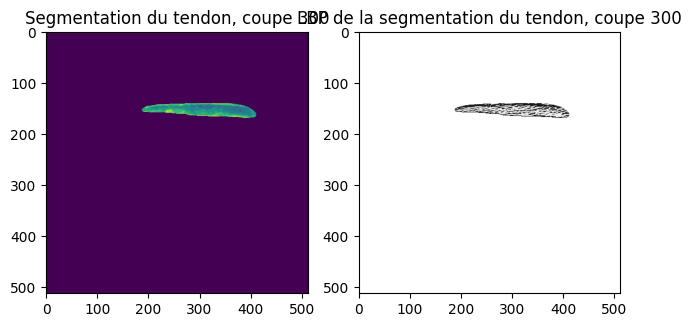

In [7]:
# Comparaison segmentation avant et après LBP 
pre_tendon1 = echo_IH1_acq1_trans*(seg_IH1_acq1_trans>0)
tendon1 = np.rot90(pre_tendon1, k = 3)

img = tendon1[:,:,300]
plt.subplot(1,2,1)
plt.imshow(img)
plt.title("Segmentation du tendon, coupe 300")

plt.subplot(1,2,2)
lbp = local_binary_pattern(img, 8, 1)
plt.imshow(lbp,"gray")
plt.title("LBP de la segmentation du tendon, coupe 300")

plt.tight_layout()

### Analyse d'ordre supérieur avec les bonnes coupes de segmentations de tendons. 

In [7]:
echo_IH1_acq1_trans, _ = nrrd.read("C:/Users/rmohane/Desktop/base_de_donnees/TP/IH1c/NB1 VF TP1/NB1 VF T  TP2.nrrd")
seg_NB1_acq1_trans, _  = nrrd.read("C:/Users/rmohane/Desktop/base_de_donnees/TP/NB1c/IH1 VF TP1/Segmentation.seg.nrrd")

echo_IH1_acq2_trans, _ = nrrd.read("C:/Users/rmohane/Desktop/base_de_donnees/TP/IH1c/IH1 VF TP2/IH1 VF T  TP.nrrd")
seg_IH1_acq2_trans, _  = nrrd.read("C:/Users/rmohane/Desktop/base_de_donnees/TP/IH1c/IH1 VF TP2/Segmentation.seg.nrrd")

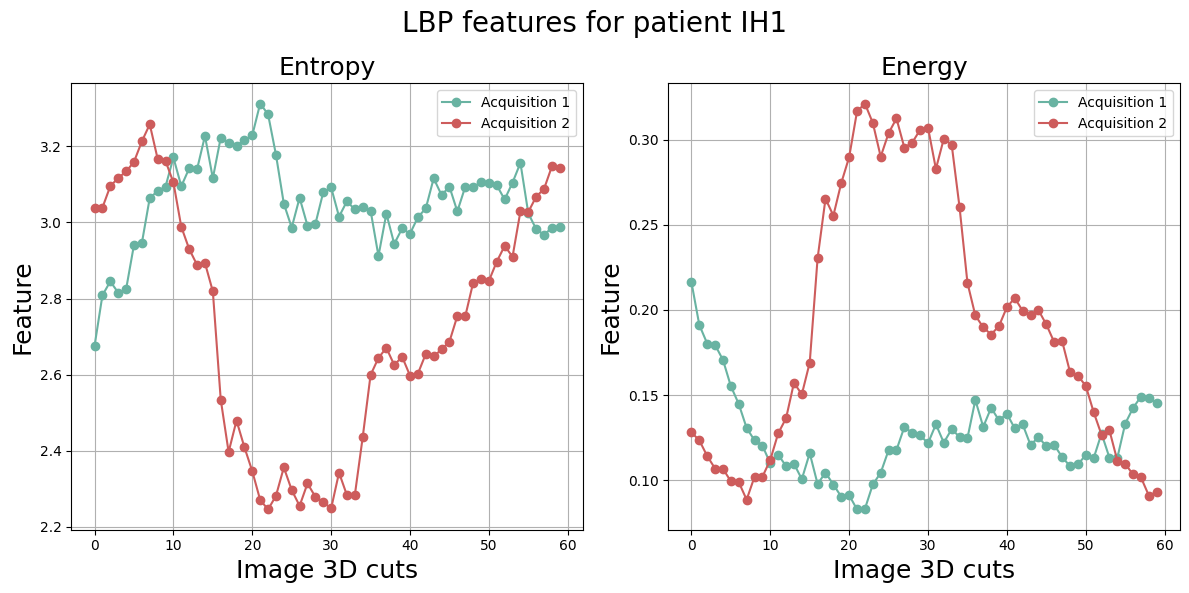

Le coefficient de variation de l'entropie entre les deux acquisitions est 12.260853070334502
Le coefficient de variation de l'énergie entre les deux acquisitions est 49.78747839603342


In [8]:
IH1_acq1, IH1_acq2, IH1_mean = LBP_treatement(echo_IH1_acq1_trans, seg_IH1_acq1_trans, 259, 319, echo_IH1_acq2_trans, seg_IH1_acq2_trans, 267, 327, 8,1, "LBP features for patient IH1")

In [9]:
echo_CB2_acq1_trans, _ = nrrd.read("C:/Users/rmohane/Desktop/base_de_donnees/TP/CB2c/CB2 VF TP1/CB2 VF T TP.nrrd")
seg_CB2_acq1_trans, _  = nrrd.read("C:/Users/rmohane/Desktop/base_de_donnees/TP/CB2c/CB2 VF TP1/Segmentation.seg.nrrd")

echo_CB2_acq2_trans, _ = nrrd.read("C:/Users/rmohane/Desktop/base_de_donnees/TP/CB2c/CB2 VF TP2/CB2 VF T TP2.nrrd")
seg_CB2_acq2_trans, _  = nrrd.read("C:/Users/rmohane/Desktop/base_de_donnees/TP/CB2c/CB2 VF TP2/Segmentation.seg.nrrd")

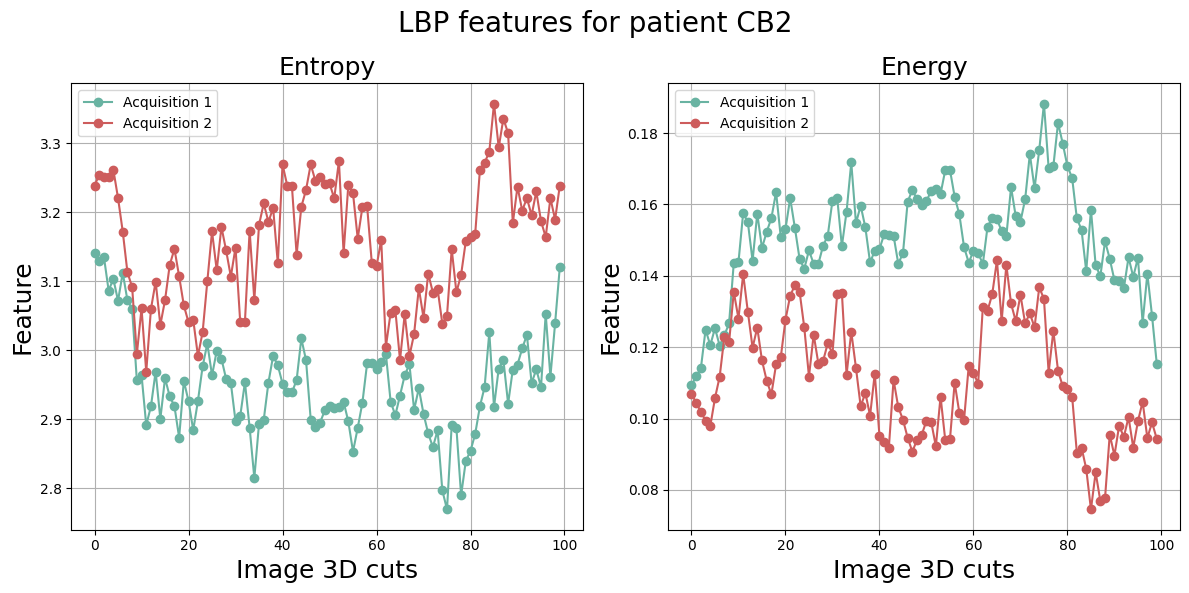

Le coefficient de variation de l'entropie entre les deux acquisitions est 5.252909962536288
Le coefficient de variation de l'énergie entre les deux acquisitions est 23.858682973580304


In [10]:
CB2_acq1, CB2_acq2, CB2_mean = LBP_treatement(echo_CB2_acq1_trans, seg_CB2_acq1_trans,  204,304, echo_CB2_acq2_trans, seg_CB2_acq2_trans, 224,324, 8,1, "LBP features for patient CB2")

In [11]:
echo_HT1_acq1_trans, _ = nrrd.read("C:/Users/rmohane/Desktop/base_de_donnees/TP/HT1c/HT1 VF TP1/HT1 VF TTP.nrrd")
seg_HT1_acq1_trans, _  = nrrd.read("C:/Users/rmohane/Desktop/base_de_donnees/TP/HT1c/HT1 VF TP1/Segmentation.seg.nrrd")

echo_HT1_acq2_trans, _ = nrrd.read("C:/Users/rmohane/Desktop/base_de_donnees/TP/HT1c/HT1 VF TP2/HT1 VF TTP2.nrrd")
seg_HT1_acq2_trans, _  = nrrd.read("C:/Users/rmohane/Desktop/base_de_donnees/TP/HT1c/HT1 VF TP2/Segmentation.seg.nrrd")

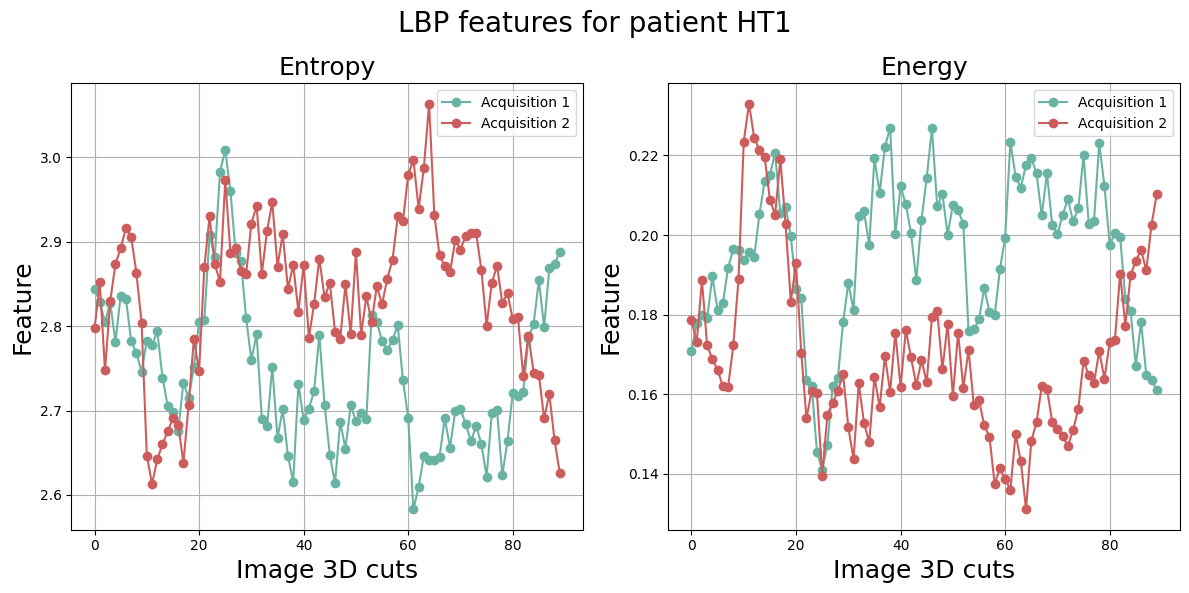

Le coefficient de variation de l'entropie entre les deux acquisitions est 4.119036418966136
Le coefficient de variation de l'énergie entre les deux acquisitions est 14.969579033398759


In [12]:
HT1_acq1, HT1_acq2, HT1_mean = LBP_treatement(echo_HT1_acq1_trans, seg_HT1_acq1_trans, 258,348, echo_HT1_acq2_trans, seg_HT1_acq2_trans, 253, 343, 8,1, "LBP features for patient HT1")


In [13]:
echo_CA1_acq1_trans, _ = nrrd.read("C:/Users/rmohane/Desktop/base_de_donnees/TP/CA1c/CA1 VF TP1/CA1 VF T TP.nrrd")
seg_CA1_acq1_trans, _  = nrrd.read("C:/Users/rmohane/Desktop/base_de_donnees/TP/CA1c/CA1 VF TP1/Segmentation.seg.nrrd")

echo_CA1_acq2_trans, _ = nrrd.read("C:/Users/rmohane/Desktop/base_de_donnees/TP/CA1c/CA1 VF TP2/CA1 VF T TP2.nrrd")
seg_CA1_acq2_trans, _  = nrrd.read("C:/Users/rmohane/Desktop/base_de_donnees/TP/CA1c/CA1 VF TP2/Segmentation.seg.nrrd")

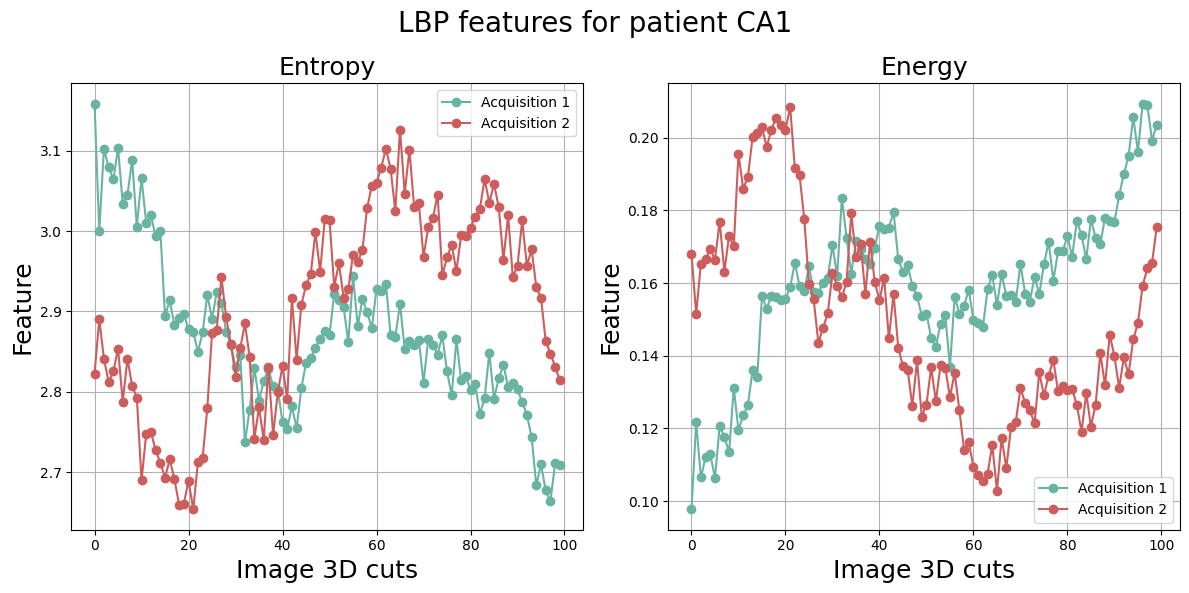

Le coefficient de variation de l'entropie entre les deux acquisitions est 4.283658266356705
Le coefficient de variation de l'énergie entre les deux acquisitions est 18.09763648111802


In [14]:
CA1_acq1, CA1_acq2, CA1_mean = LBP_treatement(echo_CA1_acq1_trans, seg_CA1_acq1_trans, 240,340, echo_CA1_acq2_trans, seg_CA1_acq2_trans,210,310, 8,1, "LBP features for patient CA1")

In [15]:
echo_ET1_acq1_trans, _ = nrrd.read("C:/Users/rmohane/Desktop/base_de_donnees/TP/ET1c/ET1 VF TP1/ET1 VF T TP.nrrd")
seg_ET1_acq1_trans, _  = nrrd.read("C:/Users/rmohane/Desktop/base_de_donnees/TP/ET1c/ET1 VF TP1/Segmentation.seg.nrrd")

echo_ET1_acq2_trans, _ = nrrd.read("C:/Users/rmohane/Desktop/base_de_donnees/TP/ET1c/ET1 VF TP2/ET1 VF TTP2.nrrd")
seg_ET1_acq2_trans, _  = nrrd.read("C:/Users/rmohane/Desktop/base_de_donnees/TP/ET1c/ET1 VF TP2/Segmentation_1.seg.nrrd")

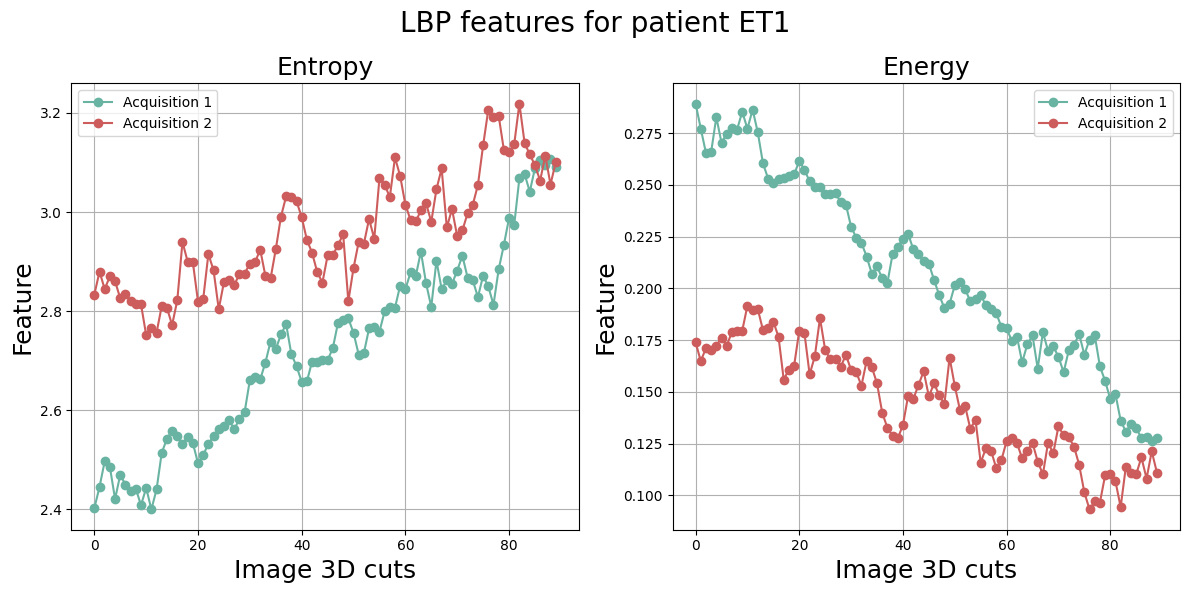

Le coefficient de variation de l'entropie entre les deux acquisitions est 6.4280770117037
Le coefficient de variation de l'énergie entre les deux acquisitions est 27.892518401138794


In [16]:
ET1_acq1_d1a0, ET1_acq2_d1a0, ET1_mean_d1a0 = LBP_treatement(echo_ET1_acq1_trans, seg_ET1_acq1_trans, 230,320, echo_ET1_acq2_trans, seg_ET1_acq2_trans,227,317, 8,1, "LBP features for patient ET1")

In [17]:
echo_SLT_acq1_trans, _ = nrrd.read("C:/Users/rmohane/Desktop/base_de_donnees/TP/SLTc/SLT VF TP1/SLT VF T TP.nrrd")
seg_SLT_acq1_trans, _  = nrrd.read("C:/Users/rmohane/Desktop/base_de_donnees/TP/SLTc/SLT VF TP1/Segmentation.seg.nrrd")

echo_SLT_acq2_trans, _ = nrrd.read("C:/Users/rmohane/Desktop/base_de_donnees/TP/SLTc/SLT VF TP2/SLT VF T TP2.nrrd")
seg_SLT_acq2_trans, _  = nrrd.read("C:/Users/rmohane/Desktop/base_de_donnees/TP/SLTc/SLT VF TP2/Segmentation.seg.nrrd")

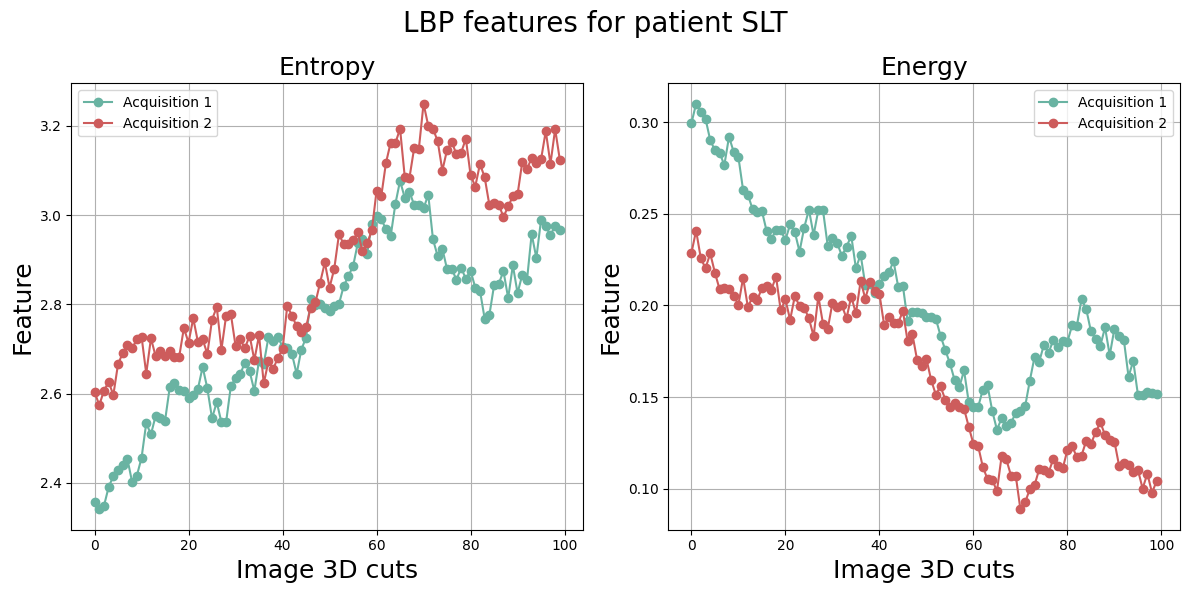

Le coefficient de variation de l'entropie entre les deux acquisitions est 4.296686336610111
Le coefficient de variation de l'énergie entre les deux acquisitions est 18.821624951732165


In [18]:
SLT_acq1, SLT_acq2, SLT_mean = LBP_treatement(echo_SLT_acq1_trans, seg_SLT_acq1_trans, 230,330, echo_SLT_acq2_trans, seg_SLT_acq2_trans,200,300, 8,1, "LBP features for patient SLT")

In [19]:
echo_JH1_acq1_trans, _ = nrrd.read("C:/Users/rmohane/Desktop/base_de_donnees/TP/JH1c/JH1 VF TP1/JH1 VF T TP.nrrd")
seg_JH1_acq1_trans, _  = nrrd.read("C:/Users/rmohane/Desktop/base_de_donnees/TP/JH1c/JH1 VF TP1/Segmentation.seg.nrrd")

echo_JH1_acq2_trans, _ = nrrd.read("C:/Users/rmohane/Desktop/base_de_donnees/TP/JH1c/JH1 VF TP2/JH1 VF T TP2.nrrd")
seg_JH1_acq2_trans, _  = nrrd.read("C:/Users/rmohane/Desktop/base_de_donnees/TP/JH1c/JH1 VF TP2/Segmentation.seg.nrrd")

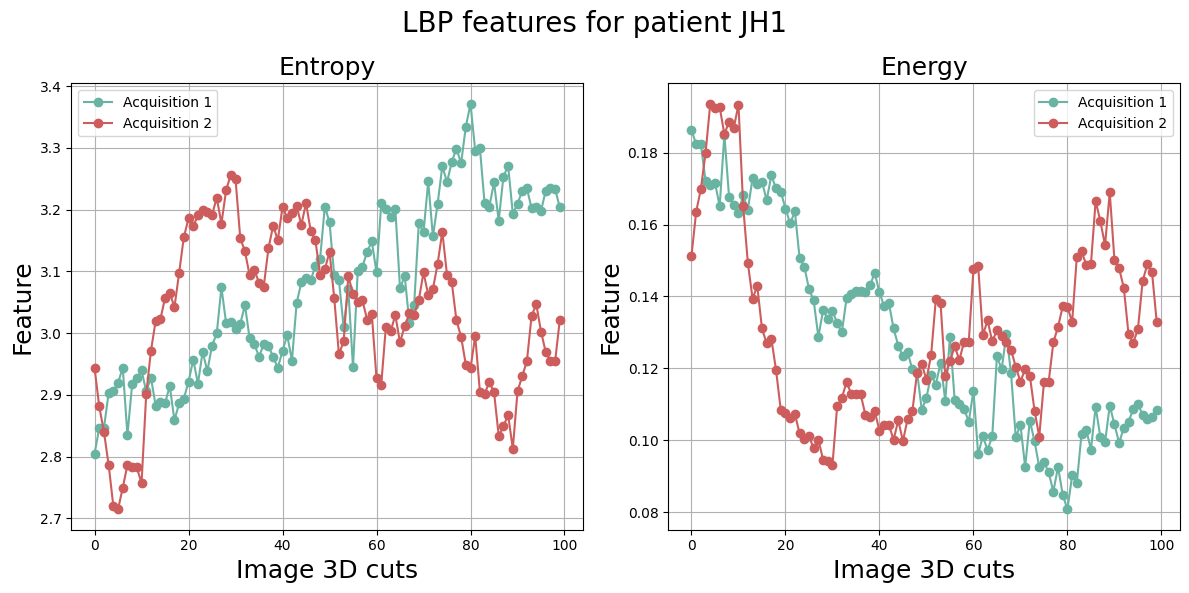

Le coefficient de variation de l'entropie entre les deux acquisitions est 4.692908975905027
Le coefficient de variation de l'énergie entre les deux acquisitions est 18.664512552230818


In [20]:
JH1_acq1, JH1_acq2, JH1_mean = LBP_treatement(echo_JH1_acq1_trans, seg_JH1_acq1_trans, 232,332, echo_JH1_acq2_trans, seg_JH1_acq2_trans,233,333, 8,1, "LBP features for patient JH1")

In [21]:
echo_MK1_acq1_trans, _ = nrrd.read("C:/Users/rmohane/Desktop/base_de_donnees/TP/MK1c/MK1 VF TP1/MK1 VF T TP.nrrd")
seg_MK1_acq1_trans, _  = nrrd.read("C:/Users/rmohane/Desktop/base_de_donnees/TP/MK1c/MK1 VF TP1/Segmentation.seg.nrrd")

echo_MK1_acq2_trans, _ = nrrd.read("C:/Users/rmohane/Desktop/base_de_donnees/TP/MK1c/MK1 VF TP2/MK1 VF T TP2.nrrd")
seg_MK1_acq2_trans, _  = nrrd.read("C:/Users/rmohane/Desktop/base_de_donnees/TP/MK1c/MK1 VF TP2/Segmentation.seg.nrrd")

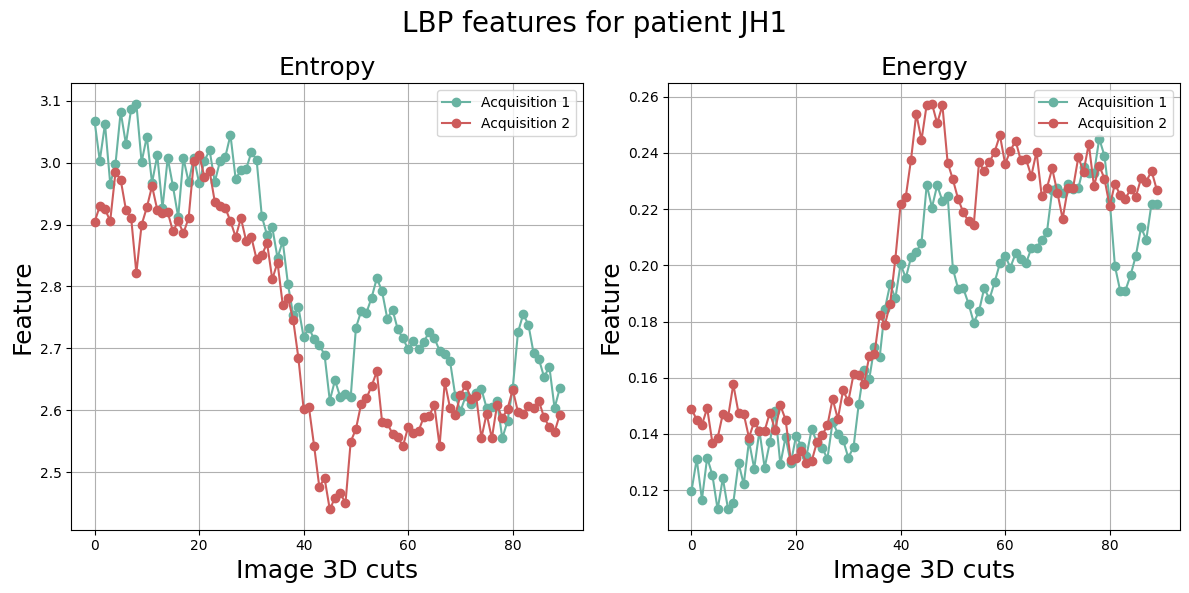

Le coefficient de variation de l'entropie entre les deux acquisitions est 2.9320527466126522
Le coefficient de variation de l'énergie entre les deux acquisitions est 9.080301804534061


In [22]:
MK1_acq1, MK1_acq2, MK1_mean = LBP_treatement(echo_MK1_acq1_trans, seg_MK1_acq1_trans, 172,262, echo_MK1_acq2_trans, seg_MK1_acq2_trans,198,288, 8,1, "LBP features for patient JH1")

In [23]:
echo_SR1_acq1_trans, _ = nrrd.read("C:/Users/rmohane/Desktop/base_de_donnees/TP/SR1c/SR1 VF TP1/SR1 VF T TP.nrrd")
seg_SR1_acq1_trans, _  = nrrd.read("C:/Users/rmohane/Desktop/base_de_donnees/TP/SR1c/SR1 VF TP1/Segmentation.seg.nrrd")

echo_SR1_acq2_trans, _ = nrrd.read("C:/Users/rmohane/Desktop/base_de_donnees/TP/SR1c/SR1 VF TP2/SR1 VF T TP2.nrrd")
seg_SR1_acq2_trans, _  = nrrd.read("C:/Users/rmohane/Desktop/base_de_donnees/TP/SR1c/SR1 VF TP2/Segmentation.seg.nrrd")

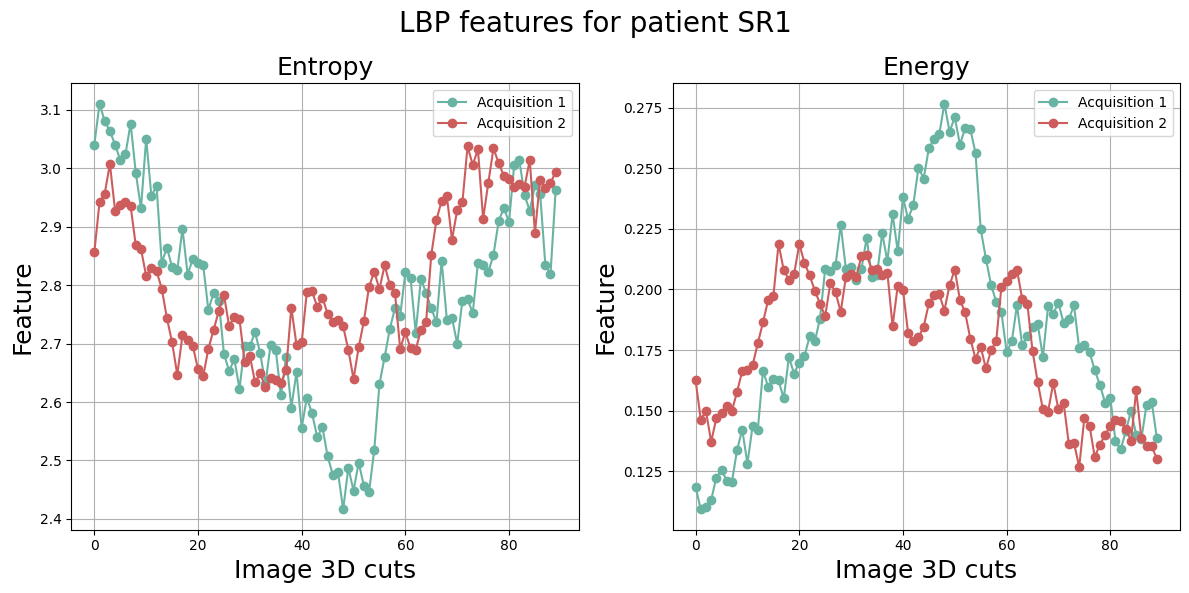

Le coefficient de variation de l'entropie entre les deux acquisitions est 3.806548411836553
Le coefficient de variation de l'énergie entre les deux acquisitions est 14.841088539549506


In [24]:
SR1_acq1, SR1_acq2, SR1_mean = LBP_treatement(echo_SR1_acq1_trans, seg_SR1_acq1_trans, 215,305, echo_SR1_acq2_trans, seg_SR1_acq2_trans,230,320, 8,1, "LBP features for patient SR1")

In [25]:
echo_AV1_acq1_trans, _ = nrrd.read("C:/Users/rmohane/Desktop/base_de_donnees/TP/AV1c/AV1 VF TP1/AV1 VF T TP.nrrd")
seg_AV1_acq1_trans, _  = nrrd.read("C:/Users/rmohane/Desktop/base_de_donnees/TP/AV1c/AV1 VF TP1/Segmentation.seg.nrrd")

echo_AV1_acq2_trans, _ = nrrd.read("C:/Users/rmohane/Desktop/base_de_donnees/TP/AV1c/AV1 VF TP2/AV1 VF T TP2.nrrd")
seg_AV1_acq2_trans, _  = nrrd.read("C:/Users/rmohane/Desktop/base_de_donnees/TP/AV1c/AV1 VF TP2/Segmentation.seg.nrrd")

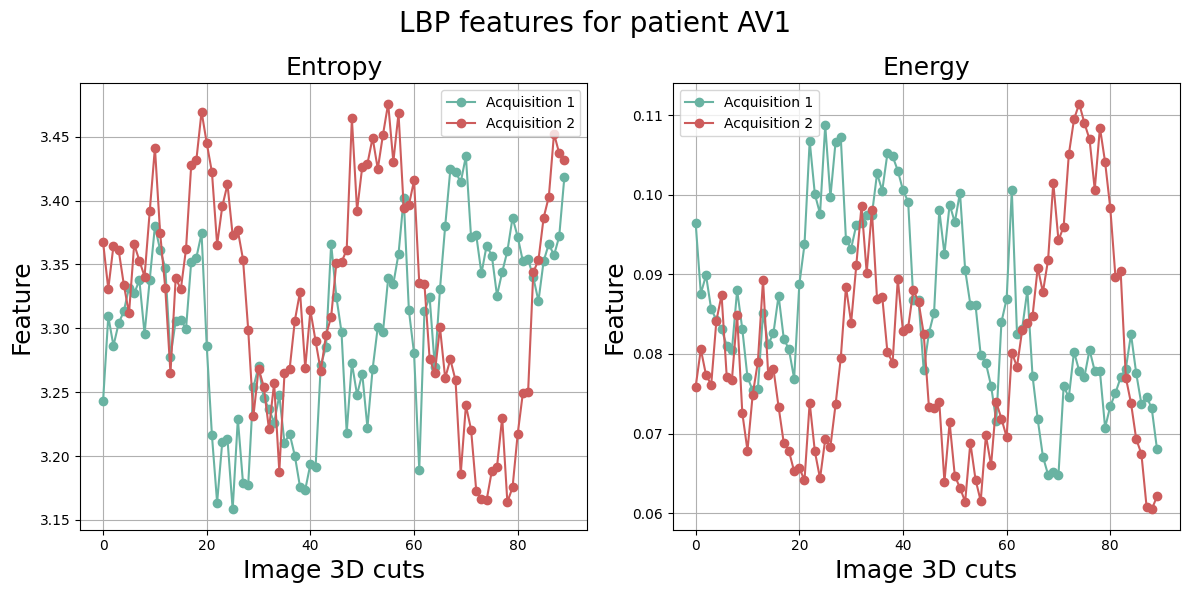

Le coefficient de variation de l'entropie entre les deux acquisitions est 2.5074878540744954
Le coefficient de variation de l'énergie entre les deux acquisitions est 16.605387855556796


In [26]:
AV1_acq1, AV1_acq2, AV1_mean = LBP_treatement(echo_AV1_acq1_trans, seg_AV1_acq1_trans, 220,310, echo_AV1_acq2_trans, seg_AV1_acq2_trans,245,335, 8,1, "LBP features for patient AV1")

In [27]:
echo_AB2_acq1_trans, _ = nrrd.read("C:/Users/rmohane/Desktop/base_de_donnees/TP/AB2c/AB2 VF TP1/AB2 VF T TP.nrrd")
seg_AB2_acq1_trans, _  = nrrd.read("C:/Users/rmohane/Desktop/base_de_donnees/TP/AB2c/AB2 VF TP1/Segmentation.seg.nrrd")

echo_AB2_acq2_trans, _ = nrrd.read("C:/Users/rmohane/Desktop/base_de_donnees/TP/AB2c/AB2 VF TP2/AB2 VF T TP2.nrrd")
seg_AB2_acq2_trans, _  = nrrd.read("C:/Users/rmohane/Desktop/base_de_donnees/TP/AB2c/AB2 VF TP2/Segmentation.seg.nrrd")

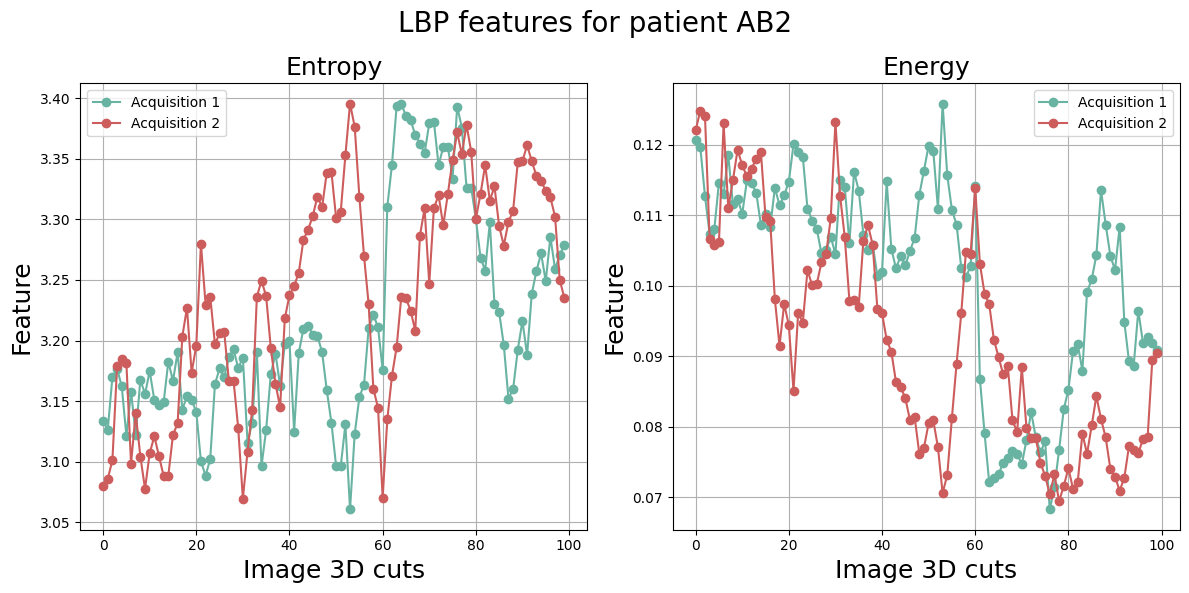

Le coefficient de variation de l'entropie entre les deux acquisitions est 2.3279585860015204
Le coefficient de variation de l'énergie entre les deux acquisitions est 13.342166650938317


In [28]:
AB2_acq1, AB2_acq2, AB2_mean = LBP_treatement(echo_AB2_acq1_trans, seg_AB2_acq1_trans, 210,310, echo_AB2_acq2_trans, seg_AB2_acq2_trans,225,325, 8,1, "LBP features for patient AB2")

In [29]:
echo_SB1_acq1_trans, _ = nrrd.read("C:/Users/rmohane/Desktop/base_de_donnees/TP/SB1c/SB1 VF TP1/SB1 VF TTP.nrrd")
seg_SB1_acq1_trans, _  = nrrd.read("C:/Users/rmohane/Desktop/base_de_donnees/TP/SB1c/SB1 VF TP1/Segmentation.seg.nrrd")

echo_SB1_acq2_trans, _ = nrrd.read("C:/Users/rmohane/Desktop/base_de_donnees/TP/SB1c/SB1 VF TP2/SB1 VF TTP2.nrrd")
seg_SB1_acq2_trans, _  = nrrd.read("C:/Users/rmohane/Desktop/base_de_donnees/TP/SB1c/SB1 VF TP2/Segmentation.seg.nrrd")

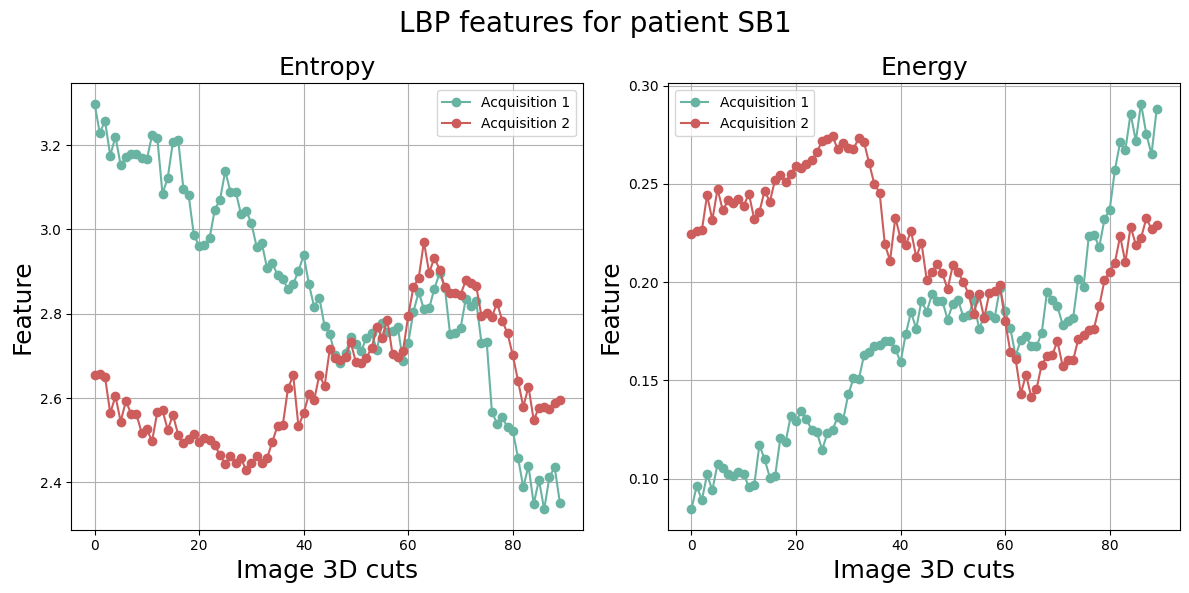

Le coefficient de variation de l'entropie entre les deux acquisitions est 10.005394436292455
Le coefficient de variation de l'énergie entre les deux acquisitions est 32.60717072168314


In [30]:
SB1_acq1, SB1_acq2, SB1_mean = LBP_treatement(echo_SB1_acq1_trans, seg_SB1_acq1_trans, 225,315, echo_SB1_acq2_trans, seg_SB1_acq2_trans,230,320, 8,1, "LBP features for patient SB1")

In [31]:
echo_FB1_acq1_trans, _ = nrrd.read("C:/Users/rmohane/Desktop/base_de_donnees/TP/FB1c/FB1 VF TP1/FB1 VF T- TP.nrrd")
seg_FB1_acq1_trans, _  = nrrd.read("C:/Users/rmohane/Desktop/base_de_donnees/TP/FB1c/FB1 VF TP1/Segmentation.seg.nrrd")

echo_FB1_acq2_trans, _ = nrrd.read("C:/Users/rmohane/Desktop/base_de_donnees/TP/FB1c/FB1 VF TP2/FB1 VF T- TP2.nrrd")
seg_FB1_acq2_trans, _  = nrrd.read("C:/Users/rmohane/Desktop/base_de_donnees/TP/FB1c/FB1 VF TP2/Segmentation.seg.nrrd")

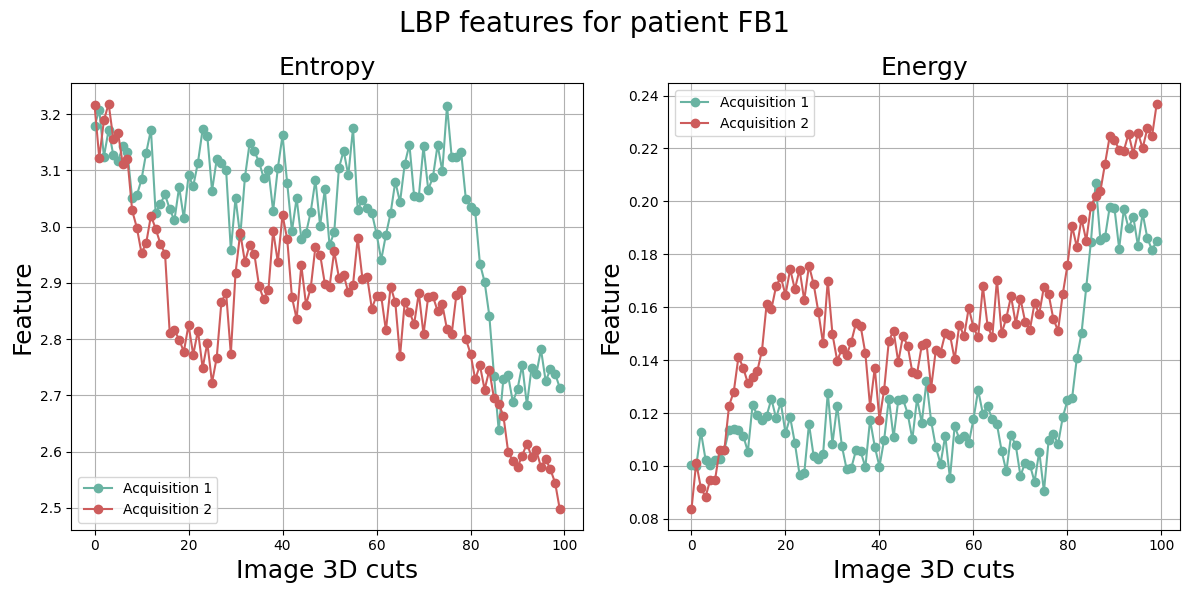

Le coefficient de variation de l'entropie entre les deux acquisitions est 4.65036690857411
Le coefficient de variation de l'énergie entre les deux acquisitions est 19.912715075272324


In [32]:
FB1_acq1, FB1_acq2, FB1_mean = LBP_treatement(echo_FB1_acq1_trans, seg_FB1_acq1_trans, 260,360, echo_FB1_acq2_trans, seg_FB1_acq2_trans,240,340, 8,1, "LBP features for patient FB1")

In [33]:
echo_CS1_acq1_trans, _ = nrrd.read(r"C:\Users\rmohane\Desktop\base_de_donnees\TP\CS1c\CS1 VF TP1\CS1 VF T TP.nrrd")
seg_CS1_acq1_trans, _  = nrrd.read(r"C:\Users\rmohane\Desktop\base_de_donnees\TP\CS1c\CS1 VF TP1\Segmentation.seg.nrrd")

echo_CS1_acq2_trans, _ = nrrd.read(r"C:\Users\rmohane\Desktop\base_de_donnees\TP\CS1c\CS1 VF TP2\CS1 VF T TP2.nrrd")
seg_CS1_acq2_trans, _  = nrrd.read(r"C:\Users\rmohane\Desktop\base_de_donnees\TP\CS1c\CS1 VF TP2\Segmentation.seg.nrrd")

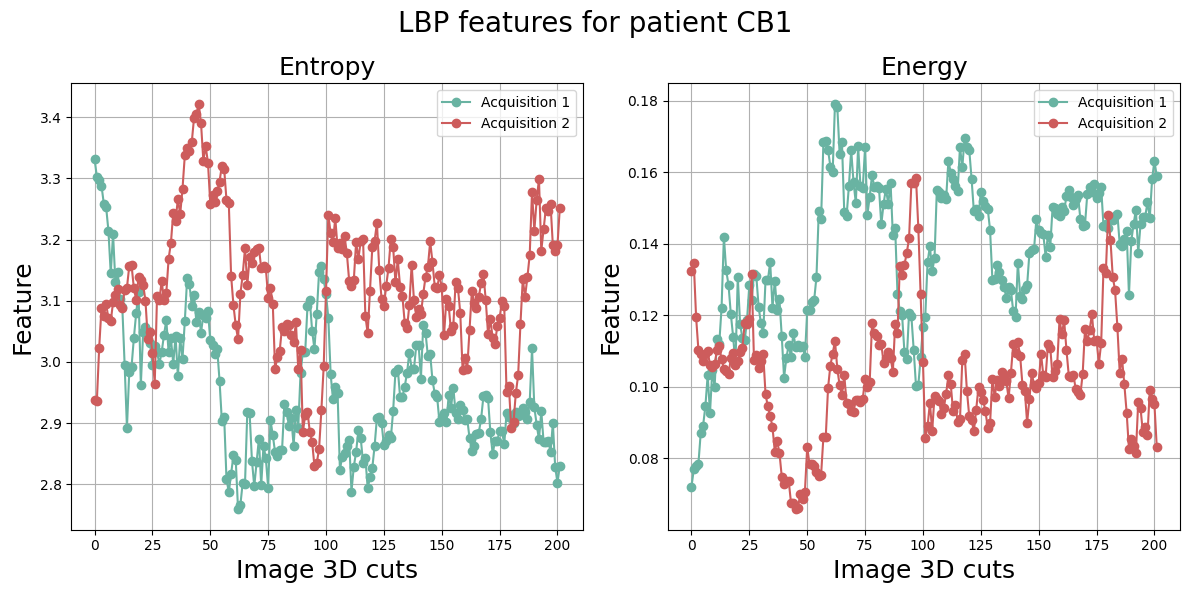

Le coefficient de variation de l'entropie entre les deux acquisitions est 5.460807756990319
Le coefficient de variation de l'énergie entre les deux acquisitions est 26.211488620219914


In [34]:
CS1_acq1, CS1_acq2, CS1_mean = LBP_treatement(echo_CS1_acq1_trans, seg_CS1_acq1_trans, 260,462, echo_CS1_acq2_trans, seg_CS1_acq2_trans,173,375, 8,1, "LBP features for patient CB1")

In [35]:
echo_CB1_acq1_trans, _ = nrrd.read("C:/Users/rmohane/Desktop/base_de_donnees/TP/CB1c/CB1 VF TP1/CB1 VF T TP.nrrd")
seg_CB1_acq1_trans, _  = nrrd.read("C:/Users/rmohane/Desktop/base_de_donnees/TP/CB1c/CB1 VF TP1/Segmentation.seg.nrrd")

echo_CB1_acq2_trans, _ = nrrd.read("C:/Users/rmohane/Desktop/base_de_donnees/TP/CB1c/CB1 VF TP2/CB1 VF T TP_2.nrrd")
seg_CB1_acq2_trans, _  = nrrd.read("C:/Users/rmohane/Desktop/base_de_donnees/TP/CB1c/CB1 VF TP2/Segmentation.seg.nrrd")

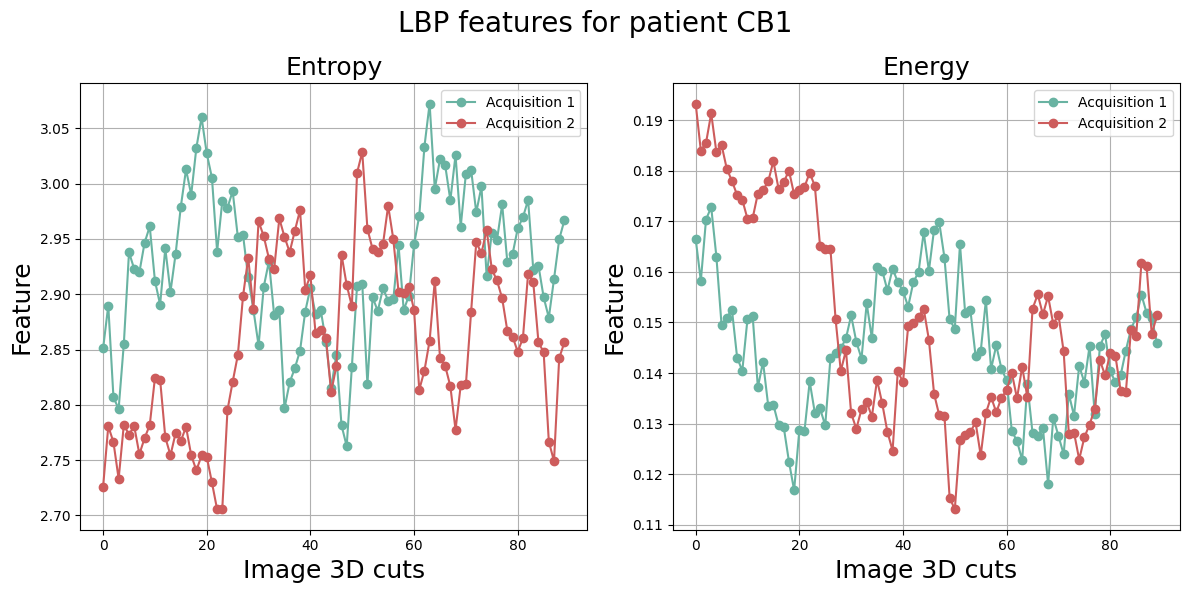

Le coefficient de variation de l'entropie entre les deux acquisitions est 3.3038416059803164
Le coefficient de variation de l'énergie entre les deux acquisitions est 12.313982345175036


In [36]:
CB1_acq1, CB1_acq2, CB1_mean = LBP_treatement(echo_CB1_acq1_trans, seg_CB1_acq1_trans, 240,330, echo_CB1_acq2_trans, seg_CB1_acq2_trans,265,355, 8,1, "LBP features for patient CB1")

In [37]:
echo_PG_acq1_trans, _ = nrrd.read("C:/Users/rmohane/Desktop/base_de_donnees/TP/PGc/PG VF TP1/PG VF T TP.nrrd")
seg_PG_acq1_trans, _  = nrrd.read("C:/Users/rmohane/Desktop/base_de_donnees/TP/PGc/PG VF TP1/Segmentation.seg.nrrd")

echo_PG_acq2_trans, _ = nrrd.read("C:/Users/rmohane/Desktop/base_de_donnees/TP/PGc/PG VF TP2/PG VF T TP2.nrrd")
seg_PG_acq2_trans, _  = nrrd.read("C:/Users/rmohane/Desktop/base_de_donnees/TP/PGc/PG VF TP2/Segmentation.seg.nrrd")

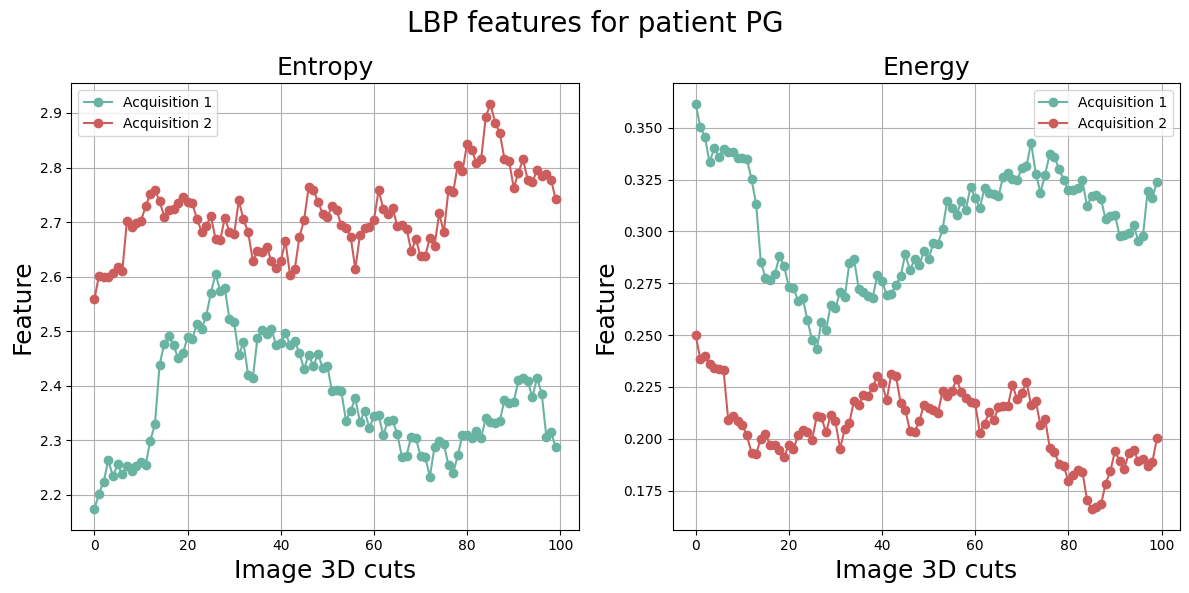

Le coefficient de variation de l'entropie entre les deux acquisitions est 9.999100413674327
Le coefficient de variation de l'énergie entre les deux acquisitions est 27.99240260381652


In [38]:
PG_acq1, PG_acq2, PG_mean = LBP_treatement(echo_PG_acq1_trans, seg_PG_acq1_trans, 190,290, echo_PG_acq2_trans, seg_PG_acq2_trans,213,313, 8,1, "LBP features for patient PG")

In [39]:
echo_YG_acq1_trans, _ = nrrd.read("C:/Users/rmohane/Desktop/base_de_donnees/TP/YGc/YG VF TP1/YG VF TTP.nrrd")
seg_YG_acq1_trans, _  = nrrd.read("C:/Users/rmohane/Desktop/base_de_donnees/TP/YGc/YG VF TP1/Segmentation.seg.nrrd")

echo_YG_acq2_trans, _ = nrrd.read("C:/Users/rmohane/Desktop/base_de_donnees/TP/YGc/YG VF TP2/YG VF TTP2.nrrd")
seg_YG_acq2_trans, _  = nrrd.read("C:/Users/rmohane/Desktop/base_de_donnees/TP/YGc/YG VF TP2/Segmentation.seg.nrrd")

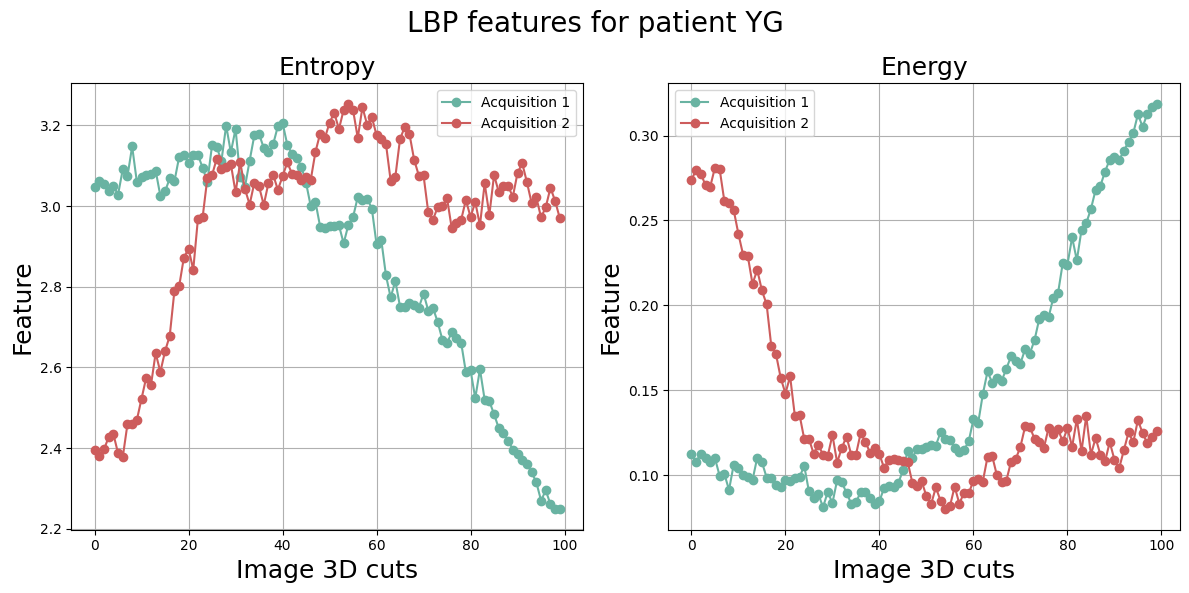

Le coefficient de variation de l'entropie entre les deux acquisitions est 10.04108433241157
Le coefficient de variation de l'énergie entre les deux acquisitions est 49.54072405874489


In [40]:
YG_acq1, YG_acq2, YG_mean = LBP_treatement(echo_YG_acq1_trans, seg_YG_acq1_trans, 245,345, echo_YG_acq2_trans, seg_YG_acq2_trans,225,325, 8,1, "LBP features for patient YG")

In [41]:
echo_IR_acq1_trans, _ = nrrd.read("C:/Users/rmohane/Desktop/base_de_donnees/TP/IRc/IR VF TP1/IR VF T TP.nrrd")
seg_IR_acq1_trans, _  = nrrd.read("C:/Users/rmohane/Desktop/base_de_donnees/TP/IRc/IR VF TP1/Segmentation.seg.nrrd")

echo_IR_acq2_trans, _ = nrrd.read("C:/Users/rmohane/Desktop/base_de_donnees/TP/IRc/IR VF TP2/IR VF T TP2.nrrd")
seg_IR_acq2_trans, _  = nrrd.read("C:/Users/rmohane/Desktop/base_de_donnees/TP/IRc/IR VF TP2/Segmentation.seg.nrrd")

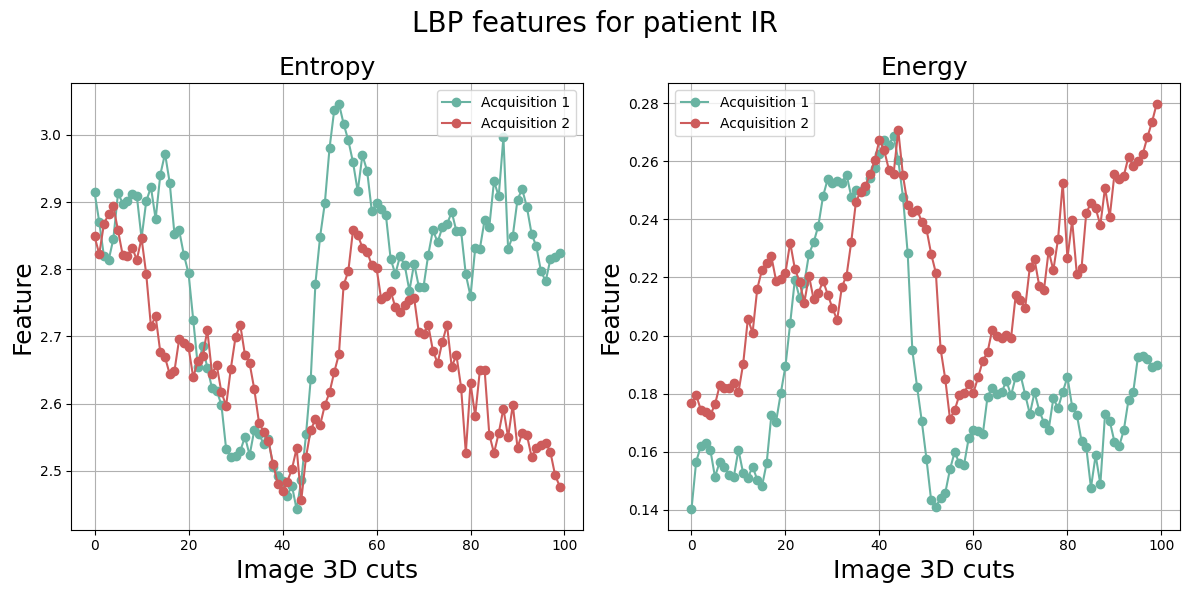

Le coefficient de variation de l'entropie entre les deux acquisitions est 4.973434335241797
Le coefficient de variation de l'énergie entre les deux acquisitions est 16.751708056474644


In [42]:
IR_acq1, IR_acq2, IR_mean = LBP_treatement(echo_IR_acq1_trans, seg_IR_acq1_trans, 255,355, echo_IR_acq2_trans, seg_IR_acq2_trans,255,355, 8,1, "LBP features for patient IR")

### Comparaison des features entre acq1 et acq2; calcul du RMSCV

In [43]:
entropy_acq1 = [IH1_acq1[0], CB2_acq1[0], HT1_acq1[0], CA1_acq1[0], ET1_acq1_d1a0[0],
           SLT_acq1[0], JH1_acq1[0], MK1_acq1[0], SR1_acq1[0], 
           AV1_acq1[0], AB2_acq1[0], SB1_acq1[0], FB1_acq1[0], CS1_acq1[0],
           CB1_acq1[0], PG_acq1[0], YG_acq1[0], IR_acq1[0]]

entropy_acq2 = [IH1_acq2[0], CB2_acq2[0], HT1_acq2[0], CA1_acq2[0], ET1_acq2_d1a0[0],
                SLT_acq2[0], JH1_acq2[0], MK1_acq2[0], SR1_acq2[0], 
                AV1_acq2[0], AB2_acq2[0], SB1_acq2[0], FB1_acq2[0], CS1_acq1[0],
                CB1_acq2[0], PG_acq2[0], YG_acq2[0], IR_acq2[0]]

In [44]:
# CV pour énergie 
energy_acq1 = [IH1_acq1[1], CB2_acq1[1], HT1_acq1[1], CA1_acq1[1], ET1_acq1_d1a0[1],
           SLT_acq1[1], JH1_acq1[1], MK1_acq1[1], SR1_acq1[1], 
           AV1_acq1[1], AB2_acq1[1], SB1_acq1[1], FB1_acq1[1], CS1_acq1[1],
           CB1_acq1[1], PG_acq1[1], YG_acq1[1], IR_acq1[1]]

energy_acq2 = [IH1_acq2[1], CB2_acq2[1], HT1_acq2[1], CA1_acq2[1], ET1_acq2_d1a0[1],
                SLT_acq2[1], JH1_acq2[1], MK1_acq2[1], SR1_acq2[1], 
                AV1_acq2[1], AB2_acq2[1], SB1_acq2[1], FB1_acq2[1], CS1_acq2[1],
                CB1_acq2[1], PG_acq2[1], YG_acq2[1], IR_acq2[1]]

In [ ]:
# Calcul du cv pour l'entropie 
mean_acq1 = []
for i in range(len(entropy_acq1)): 
    mean_acq1.append(np.mean(entropy_acq1[i]))

mean_acq2 = []
for i in range(len(entropy_acq2)): 
    mean_acq2.append(np.mean(entropy_acq2[i]))

print(cv_robuste_mad(mean_acq1,mean_acq2))

3.6717422628917973


In [ ]:
# Calcul du CV pour l'énergie
mean_acq1 = []
for i in range(len(energy_acq1)): 
    mean_acq1.append(np.mean(energy_acq1[i]))

mean_acq2 = []
for i in range(len(energy_acq1)): 
    mean_acq2.append(np.mean(energy_acq2[i]))

print(cv_robuste_mad(mean_acq1,mean_acq2))

16.78642709567467


### Affichage de la variance, et plot tous les sujets 

In [57]:
# calculde la moyenne entre la première et deuxieme acquisition
mean_energy = []
mean_entropy = []

for i in range(len(energy_acq1)):  # boucle sur les patients
    nb_coupes_i = len(energy_acq1[i])  # nombre de coupes pour le patient i
    patient_energy = []
    patient_entropy = []
    
    for j in range(nb_coupes_i):  # boucle sur les coupes de ce patient
        mean_e = (energy_acq1[i][j] + energy_acq2[i][j]) / 2
        mean_h = (entropy_acq1[i][j] + entropy_acq2[i][j]) / 2
        patient_energy.append(mean_e)
        patient_entropy.append(mean_h)
    
    mean_energy.append(patient_energy)
    mean_entropy.append(patient_entropy)

In [58]:
feature1_mean = [IH1_mean[0], CB2_mean[0], HT1_mean[0], CA1_mean[0], ET1_mean_d1a0[0],
           SLT_mean[0], JH1_acq1[0], MK1_mean[0], SR1_mean[0], 
           AV1_mean[0], AB2_mean[0], SB1_mean[0], FB1_mean[0], CS1_mean[0],
           CB1_mean[0], PG_mean[0], YG_mean[0], IR_mean[0]]

feature2_mean = [IH1_mean[1], CB2_mean[1], HT1_mean[1], CA1_mean[1], ET1_mean_d1a0[1],
           SLT_mean[1], JH1_acq1[1], MK1_mean[1], SR1_mean[1], 
           AV1_mean[1], AB2_mean[1], SB1_mean[1], FB1_mean[1], CS1_mean[1],
           CB1_mean[1], PG_mean[1], YG_mean[1], IR_mean[1]]

In [75]:
def display_two_plot_entropy(feature1_mean): 
    plt.figure(figsize=(12,6))
    colormap = ["#69B3A2","indianred","darkgrey","goldenrod","slateblue","olive","steelblue","palevioletred",
                "peru", "darkseagreen"]
    colormap2 = ["violet","navy","tan","brown", "salmon", "yellowgreen", "aqua",
                "deepskyblue"]
    patient_label = ["IH1", "CB2", "HT1", "CA1", "ET1", "SLT", "JH1", "MK1", "SR1", "AV1", "AB2", "SB1", "FB1", "CS1", "CB1", "PG", "YG","IR"]
    feature1_mean_x = feature1_mean[:10]
    feature1_mean_xx = feature1_mean[11:]
    plt.subplot(1,2,1)
   
    for j in range(len(feature1_mean_x)):
        plt.plot(feature1_mean_x[j], marker = 'o', color = colormap[j], label = patient_label[j])
        plt.xlim(-10,105)
        plt.ylim(2.4, 3.6)
        plt.grid(True)
        plt.title("Entropy values for subject 1 to 10", fontsize=18)
        plt.xlabel("Slide of the 3D volume", fontsize = 15)

    plt.subplot(1,2,2)
   
    for j in range(len(feature1_mean_xx)):
        plt.plot(feature1_mean_xx[j], marker = 'o', color = colormap2[j], label = patient_label[j])
        plt.xlim(-10,105)
        plt.ylim(2.4, 3.6)
        plt.grid(True)
        plt.title("Entropy values for subject 1 to 10", fontsize=18)
        plt.xlabel("Slide of the 3D volume", fontsize = 15)

In [72]:
def display_two_plot_energy(feature1_mean): 
    plt.figure(figsize=(12,6))
    colormap = ["#69B3A2","indianred","darkgrey","goldenrod","slateblue","olive","steelblue","palevioletred",
                "peru", "darkseagreen"]
    colormap2 = ["violet","navy","tan","brown", "salmon", "yellowgreen", "aqua",
                "deepskyblue"]
    patient_label = ["IH1", "CB2", "HT1", "CA1", "ET1", "SLT", "JH1", "MK1", "SR1", "AV1", "AB2", "SB1", "FB1", "CS1", "CB1", "PG", "YG","IR"]
    feature1_mean_x = feature1_mean[:10]
    feature1_mean_xx = feature1_mean[11:]
    plt.subplot(1,2,1)
   
    for j in range(len(feature1_mean_x)):
        plt.plot(feature1_mean_x[j], marker = 'o', color = colormap[j], label = patient_label[j])
        plt.xlim(-10,105)
        plt.ylim(0.02,0.32)
        plt.grid(True)
        plt.title("Energy values for subject 1 to 10", fontsize=18)
        plt.xlabel("Slide of the 3D volume", fontsize = 15)

    plt.subplot(1,2,2)
   
    for j in range(len(feature1_mean_xx)):
        plt.plot(feature1_mean_xx[j], marker = 'o', color = colormap2[j], label = patient_label[j])
        plt.xlim(-10,105)
        plt.ylim(0.02,0.32)
        plt.grid(True)
        plt.title("Energy values for subject 10 to 20", fontsize=18)
        plt.xlabel("Slide of the 3D volume", fontsize = 15)

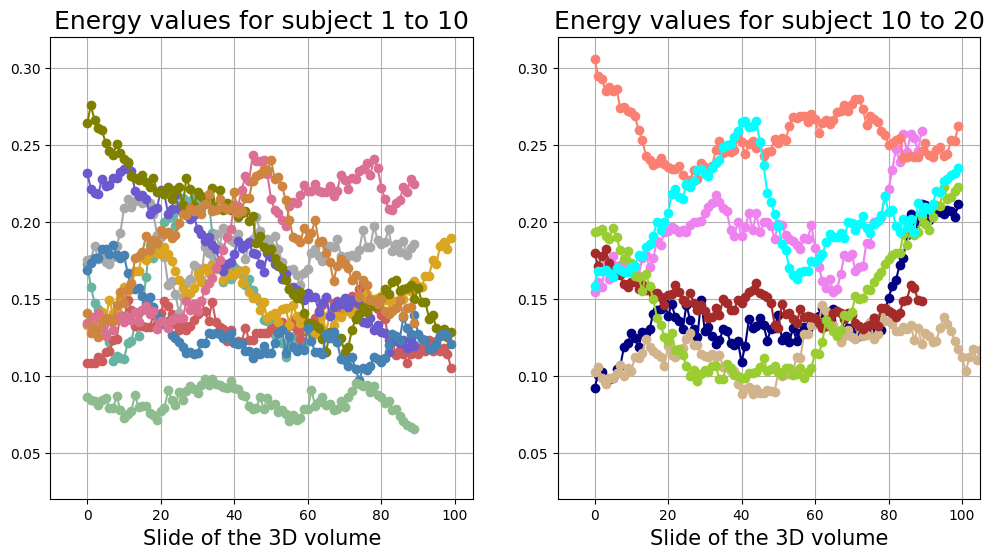

In [77]:
display_two_plot_energy(mean_energy)

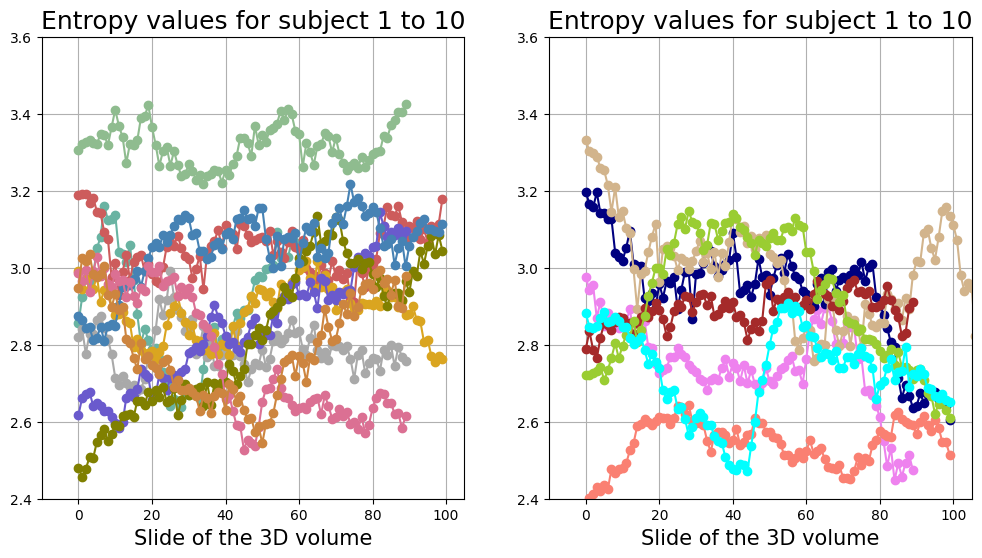

In [79]:
display_two_plot_entropy(mean_entropy)

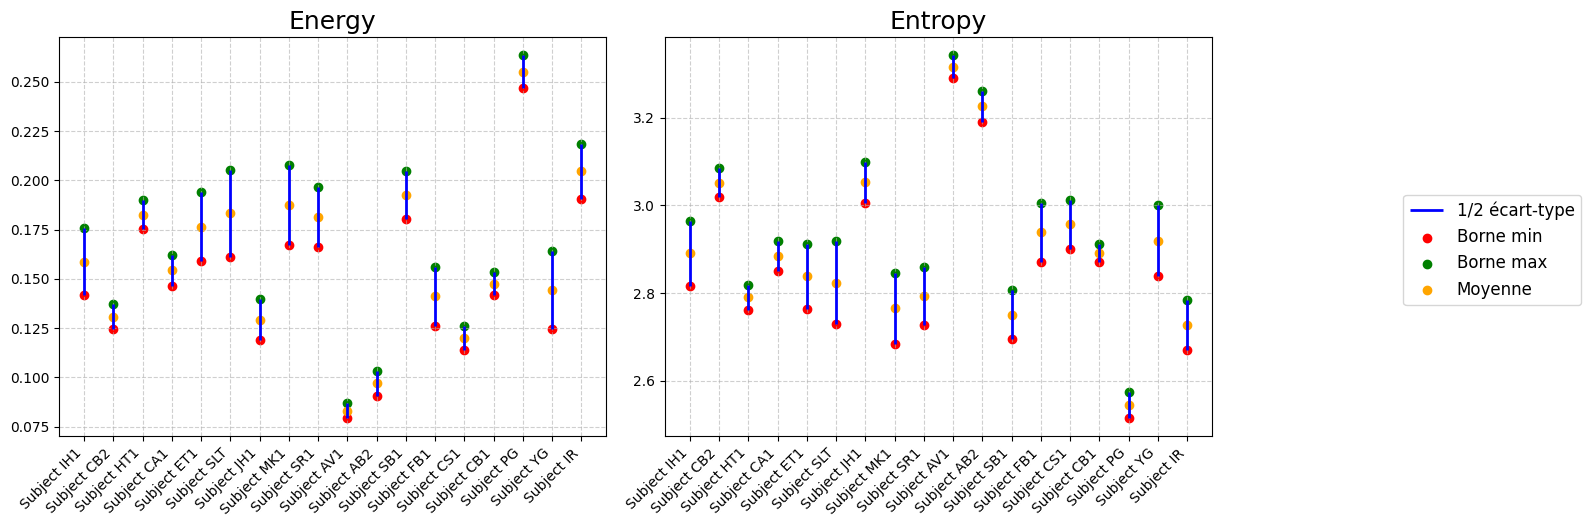

In [80]:
plot_variance_intraindividuelle_energy_entropy(mean_energy, mean_entropy, "")

### Faire pour la GM 

In [83]:
def find_file(path: str, name_file:str) -> np.ndarray :     ## UTILISER CETTE FONCTION
    """ 
    This function allows you to find a file using a path that allows you to access it and the name of the file;  

    Args:
        path (str): From the file explorer, find the file to open, right-click on it, go to "properties", copy what is written in "location" and paste it into path. IMPORTANT : Put r before the the path e.g r"C:\..." 
        name_file (str): name of the file; don't forget to write the entire name of the file, with the nrrd include, e.g "IH1 VF T  TP2.nrrd" and not only "IH1 VF T  TP2". 
        CAREFUL !! Don't forget to put "" around the path and around name_file parameter e.g below. 
    
    Returns:
        np.ndarray: the file that you want to open is an ultrasound image or a segmentation. 
    """
    full_path = os.path.join(path, name_file)
    echo, _ = nrrd.read(full_path)

    return echo 

In [86]:
# On ouvre les écho et segmentations avant réorientations
echo_NB1_before_reslice_acq1 = find_file(r"C:\Users\rmohane\Desktop\base_de_donnees\GM\NB1\NB1 VF+ GM1", "NB1 VF T GM2.nrrd")
seg_NB1_before_reslice_acq1 = find_file(r"C:\Users\rmohane\Desktop\base_de_donnees\GM\NB1\NB1 VF+ GM1", "Segmentation.seg.nrrd")

NB1_before_reslice_acq2 = find_file(r"C:\Users\rmohane\Desktop\base_de_donnees\GM\NB1\NB1 VF + GM2", "NB1 VF T GM2.nrrd")
seg_NB1_before_reslice_acq2 = find_file(r"C:\Users\rmohane\Desktop\base_de_donnees\GM\NB1\NB1 VF + GM2", "Segmentation.seg.nrrd")

# On ouvre les écho et segmentations après réorientations
echo_NB1_after_reslice_acq1 = find_file(r"C:\Users\rmohane\Desktop\base_de_donnees\GM\NB1\NB1VF+GM1reslice", "ResliceNB1VFGM1b.nrrd")
seg_NB1_after_reslice_acq1 = find_file(r"C:\Users\rmohane\Desktop\base_de_donnees\GM\NB1\NB1VF+GM1reslice", "Segmentation.seg.nrrd")

echo_NB1_after_reslice_acq2 = find_file(r"C:\Users\rmohane\Desktop\base_de_donnees\GM\NB1\NB1 VF+GM2reslice", "ResliceNB1VFGM2b.nrrd")
seg_NB1_after_reslice_acq2 = find_file(r"C:\Users\rmohane\Desktop\base_de_donnees\GM\NB1\NB1 VF+GM2reslice", "Segmentation.seg.nrrd")

In [87]:
# On ouvre les écho et segmentations avant réorientations
echo_CS1_before_reslice_acq1 = find_file(r"C:\Users\rmohane\Desktop\base_de_donnees\GM\CS1\CS1 VF + GM1", "CS1 VF T GM.nrrd")
seg_CS1_before_reslice_acq1 = find_file(r"C:\Users\rmohane\Desktop\base_de_donnees\GM\CS1\CS1 VF + GM1", "Segmentation.seg.nrrd")

echo_CS1_before_reslice_acq2 = find_file(r"C:\Users\rmohane\Desktop\base_de_donnees\GM\CS1\CS1 VF+ GM2", "CS1 VF T GM2.nrrd")
seg_CS1_before_reslice_acq2 = find_file(r"C:\Users\rmohane\Desktop\base_de_donnees\GM\CS1\CS1 VF+ GM2", "Segmentation.seg.nrrd")


# On ouvre les écho et segmentations après réorientations
echo_CS1_after_reslice_acq1 = find_file(r"C:\Users\rmohane\Desktop\base_de_donnees\GM\GM_reshma\CS1VF+ GM1reslice", "ResliceCS1GM VFGM1c.nrrd")
seg_CS1_after_reslice_acq1 = find_file(r"C:\Users\rmohane\Desktop\base_de_donnees\GM\GM_reshma\CS1VF+ GM1reslice", "Segmentation.seg.nrrd")

echo_CS1_after_reslice_acq2 = find_file(r"C:\Users\rmohane\Desktop\base_de_donnees\GM\GM_reshma\CS1 VF+GM2reslice", "CS1VFGM2creslice.nrrd")
seg_CS1_after_reslice_acq2 = find_file(r"C:\Users\rmohane\Desktop\base_de_donnees\GM\GM_reshma\CS1 VF+GM2reslice", "Segmentation.seg.nrrd")

In [88]:
# On ouvre les écho et segmentations avant réorientations
echo_HT1_before_reslice_acq1 = find_file(r"C:\Users\rmohane\Desktop\base_de_donnees\GM\HT1\HT1 VF+ GM1", "HT1 VF T GM.nrrd")
seg_HT1_before_reslice_acq1 = find_file(r"C:\Users\rmohane\Desktop\base_de_donnees\GM\HT1\HT1 VF+ GM1", "Segmentation.seg.nrrd")

echo_HT1_before_reslice_acq2 = find_file(r"C:\Users\rmohane\Desktop\base_de_donnees\GM\HT1\HT1 VF + GM2", "HT1 VF T GM2.nrrd")
seg_HT1_before_reslice_acq2 = find_file(r"C:\Users\rmohane\Desktop\base_de_donnees\GM\HT1\HT1 VF + GM2", "Segmentation.seg.nrrd")


# On ouvre les écho et segmentations après réorientations
echo_HT1_after_reslice_acq1 = find_file(r"C:\Users\rmohane\Desktop\base_de_donnees\GM\GM_reshma\HT1 VF+GM1reslice", "ResliceHT1VFGM1b.nrrd")
seg_HT1_after_reslice_acq1 = find_file(r"C:\Users\rmohane\Desktop\base_de_donnees\GM\GM_reshma\HT1 VF+GM1reslice", "Segmentation.seg.nrrd")

echo_HT1_after_reslice_acq2 = find_file(r"C:\Users\rmohane\Desktop\base_de_donnees\GM\GM_reshma\HT1 VF + GM2reslice", "ResliceHT1VFGM2f.nrrd")
seg_HT1_after_reslice_acq2 = find_file(r"C:\Users\rmohane\Desktop\base_de_donnees\GM\GM_reshma\HT1 VF + GM2reslice", "Segmentation.seg.nrrd")

In [89]:
# On ouvre les écho et segmentations avant réorientations
echo_IH1_before_reslice_acq1 = find_file(r"C:\Users\rmohane\Desktop\base_de_donnees\GM\IH1\IH1 VF + GM1", "IH1 VF T GM.nrrd")
seg_IH1_before_reslice_acq1 = find_file(r"C:\Users\rmohane\Desktop\base_de_donnees\GM\IH1\IH1 VF + GM1", "Segmentation.seg.nrrd")

echo_IH1_before_reslice_acq2 = find_file(r"C:\Users\rmohane\Desktop\base_de_donnees\GM\IH1\IH1 VF + GM2", "IH1 VF T GM2.nrrd")
seg_IH1_before_reslice_acq2 = find_file(r"C:\Users\rmohane\Desktop\base_de_donnees\GM\IH1\IH1 VF + GM2", "Segmentation.seg.nrrd")

# On ouvre les écho et segmentations après réorientations
echo_IH1_after_reslice_acq1 = find_file(r"C:\Users\rmohane\Desktop\base_de_donnees\GM\GM_reshma\IH1 VF+ GM1reslice", "ResliceIH1 VF GM1c.nrrd")
seg_IH1_after_reslice_acq1 = find_file(r"C:\Users\rmohane\Desktop\base_de_donnees\GM\GM_reshma\IH1 VF+ GM1reslice", "Segmentation.seg.nrrd")

echo_IH1_after_reslice_acq2 = find_file(r"C:\Users\rmohane\Desktop\base_de_donnees\GM\GM_reshma\IH1 VF+ GM2reslice", "ResliceIH1VFGM2b_2.nrrd")
seg_IH1_after_reslice_acq2 = find_file(r"C:\Users\rmohane\Desktop\base_de_donnees\GM\GM_reshma\IH1 VF+ GM2reslice", "Segmentation.seg.nrrd")

In [99]:
# On ouvre les écho et segmentations avant réorientations
echo_CA1_before_reslice_acq1 = find_file("C:/Users/rmohane/Desktop/base_de_donnees/TP/CA1c/CA1 VF TP1","CA1 VF T TP.nrrd")
seg_CA1_before_reslice_acq1  = find_file("C:/Users/rmohane/Desktop/base_de_donnees/TP/CA1c/CA1 VF TP1","Segmentation.seg.nrrd")

echo_CA1_before_reslice_acq2 = find_file("C:/Users/rmohane/Desktop/base_de_donnees/TP/CA1c/CA1 VF TP2","CA1 VF T TP2.nrrd")
seg_CA1_before_reslice_acq2  = find_file("C:/Users/rmohane/Desktop/base_de_donnees/TP/CA1c/CA1 VF TP2","Segmentation.seg.nrrd")


# On ouvre les écho et segmentations après réorientations
echo_CA1_after_reslice_acq1 = find_file(r"C:\Users\rmohane\Desktop\base_de_donnees\GM\GM_reshma\CA1 VF + GM1reslice", "ResliceCA1 VF GM1b_2.nrrd")
seg_CA1_after_reslice_acq1 = find_file(r"C:\Users\rmohane\Desktop\base_de_donnees\GM\GM_reshma\CA1 VF + GM1reslice", "Segmentation_4.seg.nrrd")

echo_CA1_after_reslice_acq2 = find_file(r"C:\Users\rmohane\Desktop\base_de_donnees\GM\GM_reshma\CA1 VF+GM2reslice", "ResliceCA1 VFGM2b.nrrd")
seg_CA1_after_reslice_acq2 = find_file(r"C:\Users\rmohane\Desktop\base_de_donnees\GM\GM_reshma\CA1 VF+GM2reslice", "Segmentation.seg.nrrd")

In [91]:
# On ouvre les écho et segmentations avant réorientations
echo_AB2_before_reslice_acq1 = find_file(r"C:\Users\rmohane\Desktop\base_de_donnees\GM\GM_reshma\AB2 VF+ GM1", "AB2 VF T GM.nrrd")
seg_AB2_before_reslice_acq1 = find_file(r"C:\Users\rmohane\Desktop\base_de_donnees\GM\GM_reshma\AB2 VF+ GM1", "Segmentation.seg.nrrd")


echo_AB2_before_reslice_acq2 = find_file(r"C:\Users\rmohane\Desktop\base_de_donnees\GM\GM_reshma\AB2 VF + GM2", "AB2 VF T GM2.nrrd")
seg_AB2_before_reslice_acq2 = find_file(r"C:\Users\rmohane\Desktop\base_de_donnees\GM\GM_reshma\AB2 VF + GM2", "Segmentation.seg.nrrd")


# On ouvre les écho et segmentations après réorientations
echo_AB2_after_reslice_acq1 = find_file(r"C:\Users\rmohane\Desktop\base_de_donnees\GM\GM_reshma\AB2VF+ GM1reslice", "ResliceAB2 VF GM1d.nrrd")
seg_AB2_after_reslice_acq1 = find_file(r"C:\Users\rmohane\Desktop\base_de_donnees\GM\GM_reshma\AB2VF+ GM1reslice", "Segmentation.seg.nrrd")


echo_AB2_after_reslice_acq2 = find_file(r"C:\Users\rmohane\Desktop\base_de_donnees\GM\GM_reshma\AB2 VF+ GM2reslice", "ResliceAB2VFGM2b.nrrd")
seg_AB2_after_reslice_acq2 = find_file(r"C:\Users\rmohane\Desktop\base_de_donnees\GM\GM_reshma\AB2 VF+ GM2reslice", "Segmentation.seg.nrrd")

In [92]:
# On ouvre les écho et segmentations avant réorientations
echo_JH1_before_reslice_acq1 = find_file(r"C:\Users\rmohane\Desktop\base_de_donnees\GM\GM_reshma\JH1 CC+GM1", "JH1 CC T GM.nrrd")
seg_JH1_before_reslice_acq1 = find_file(r"C:\Users\rmohane\Desktop\base_de_donnees\GM\GM_reshma\JH1 CC+GM1", "Segmentation.seg.nrrd")


echo_JH1_before_reslice_acq2 = find_file(r"C:\Users\rmohane\Desktop\base_de_donnees\GM\GM_reshma\JH1CC+GM2", "JH1 CC T GM2.nrrd")
seg_JH1_before_reslice_acq2 = find_file(r"C:\Users\rmohane\Desktop\base_de_donnees\GM\GM_reshma\JH1CC+GM2", "Segmentation.seg.nrrd")


# On ouvre les écho et segmentations après réorientations
echo_JH1_after_reslice_acq1 = find_file(r"C:\Users\rmohane\Desktop\base_de_donnees\GM\GM_reshma\JH1 CC+ GM1reslice", "ResliceJH1CCGM1.nrrd")
seg_JH1_after_reslice_acq1 = find_file(r"C:\Users\rmohane\Desktop\base_de_donnees\GM\GM_reshma\JH1 CC+ GM1reslice", "Segmentation_4.seg.nrrd")


echo_JH1_after_reslice_acq2 = find_file(r"C:\Users\rmohane\Desktop\base_de_donnees\GM\GM_reshma\JH1 CC+ GM2reslice", "ResliceJH1CCGM2.nrrd")
seg_JH1_after_reslice_acq2 = find_file(r"C:\Users\rmohane\Desktop\base_de_donnees\GM\GM_reshma\JH1 CC+ GM2reslice", "Segmentation.seg.nrrd")

In [93]:
# On ouvre les écho et segmentations avant réorientations
echo_YG_before_reslice_acq1 = find_file(r"C:\Users\rmohane\Desktop\base_de_donnees\GM\GM_reshma\YG VF+ GM1", "YG VF T GM.nrrd")
seg_YG_before_reslice_acq1 = find_file(r"C:\Users\rmohane\Desktop\base_de_donnees\GM\GM_reshma\YG VF+ GM1", "Segmentation.seg.nrrd")


echo_YG_before_reslice_acq2 = find_file(r"C:\Users\rmohane\Desktop\base_de_donnees\GM\GM_reshma\YG VF+ GM2", "YG VF T GM.nrrd")
seg_YG_before_reslice_acq2 = find_file(r"C:\Users\rmohane\Desktop\base_de_donnees\GM\GM_reshma\YG VF+ GM2", "Segmentation.seg.nrrd")


# On ouvre les écho et segmentations après réorientations
echo_YG_after_reslice_acq1 = find_file(r"C:\Users\rmohane\Desktop\base_de_donnees\GM\GM_reshma\YG VF+ GM1reslice", "ResliceYG VF GM1c.nrrd")
seg_YG_after_reslice_acq1 = find_file(r"C:\Users\rmohane\Desktop\base_de_donnees\GM\GM_reshma\YG VF+ GM1reslice", "Segmentation_1.seg.nrrd")


echo_YG_after_reslice_acq2 = find_file(r"C:\Users\rmohane\Desktop\base_de_donnees\GM\GM_reshma\YG VF+ GM2reslice", "ResliceYG VFGM2b.nrrd")
seg_YG_after_reslice_acq2 = find_file(r"C:\Users\rmohane\Desktop\base_de_donnees\GM\GM_reshma\YG VF+ GM2reslice", "Segmentation_3.seg.nrrd")

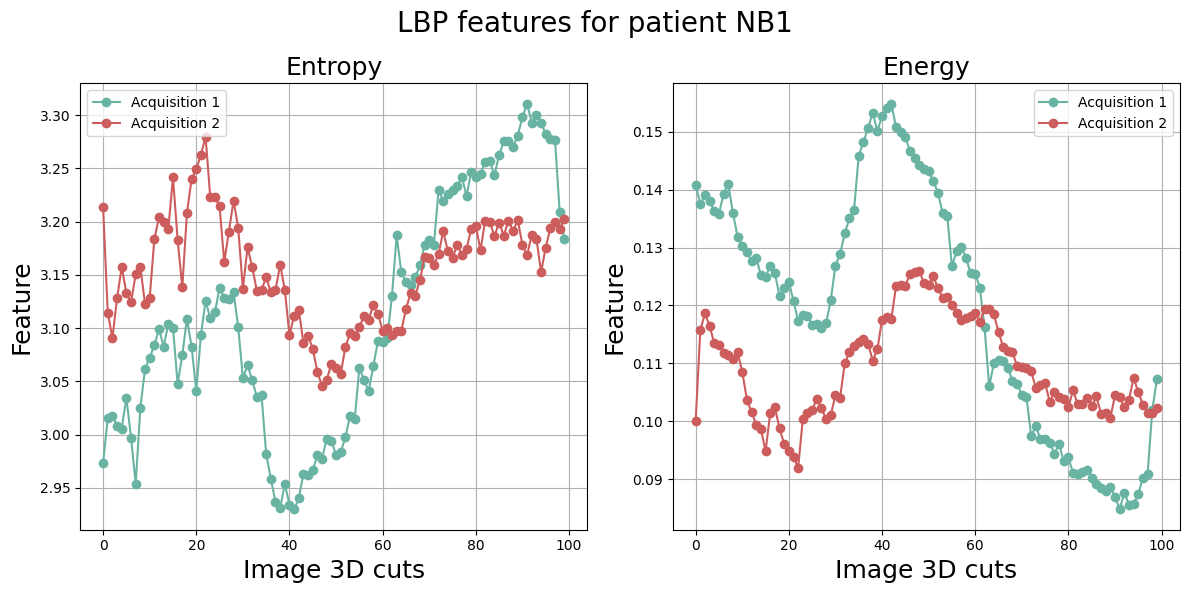

Le coefficient de variation de l'entropie entre les deux acquisitions est 2.354510519914699
Le coefficient de variation de l'énergie entre les deux acquisitions est 12.573452194828752


In [94]:
NB1_acq1, NB1_acq2, NB1_mean = LBP_treatement(echo_NB1_before_reslice_acq1, seg_NB1_before_reslice_acq1, 233, 333, NB1_before_reslice_acq2, seg_NB1_before_reslice_acq2, 223, 323, 8,1, "LBP features for patient NB1")

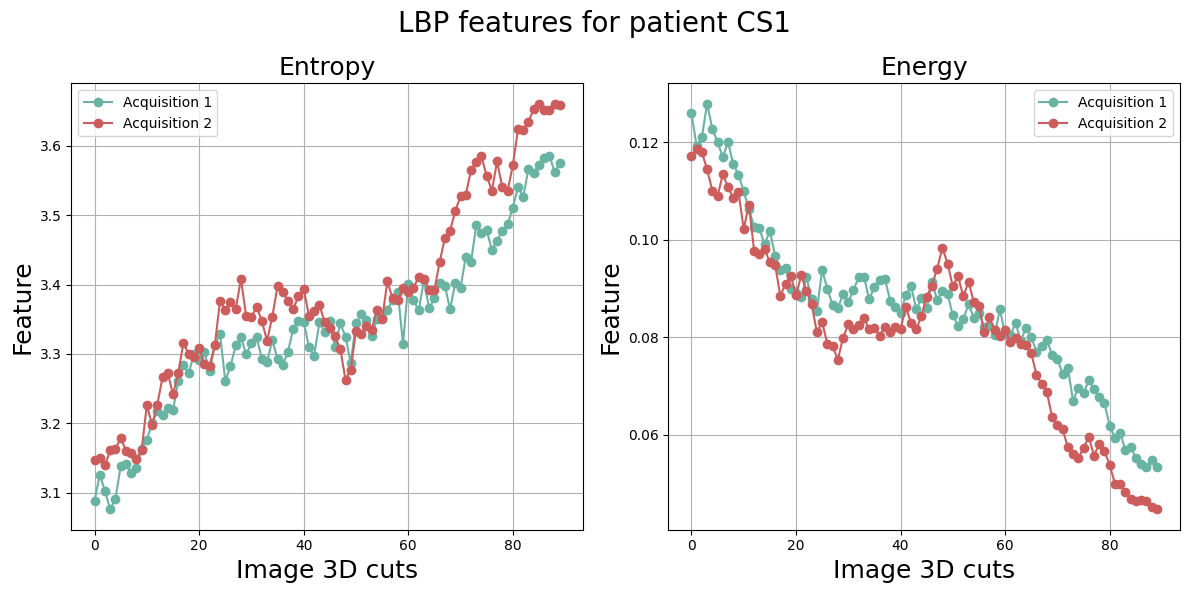

Le coefficient de variation de l'entropie entre les deux acquisitions est 1.2611746216026989
Le coefficient de variation de l'énergie entre les deux acquisitions est 6.508463039627031


In [95]:
CS1_acq1, CS1_acq2, CS1_mean = LBP_treatement(echo_CS1_before_reslice_acq1, seg_CS1_before_reslice_acq1, 215, 305, echo_CS1_before_reslice_acq2, seg_CS1_before_reslice_acq2, 228, 318, 8,1, "LBP features for patient CS1")

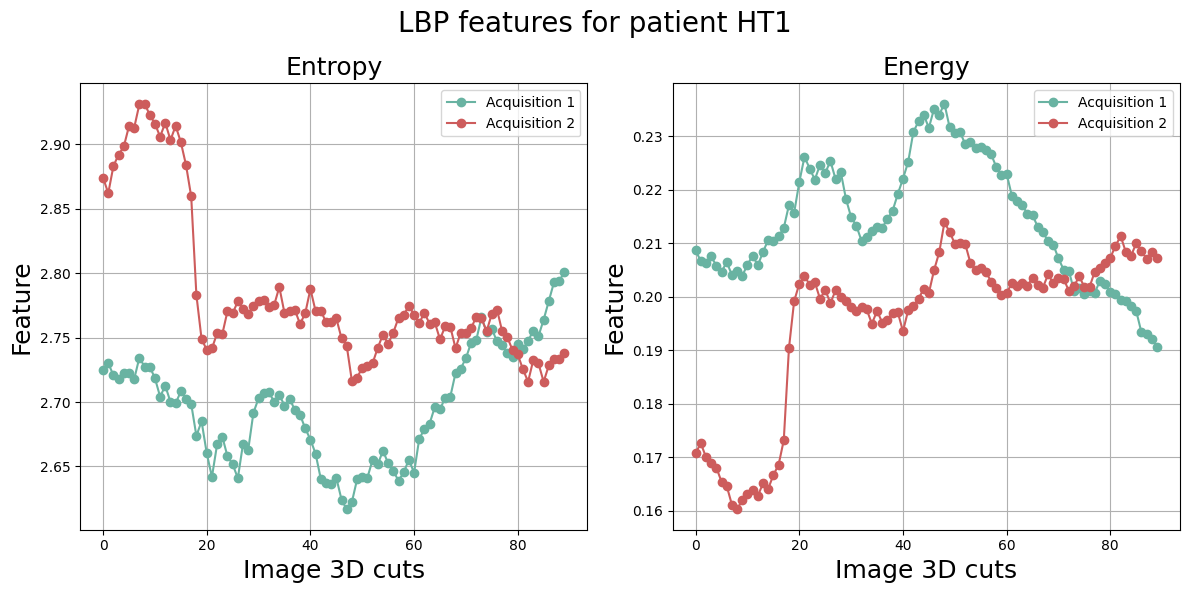

Le coefficient de variation de l'entropie entre les deux acquisitions est 2.8681191193474973
Le coefficient de variation de l'énergie entre les deux acquisitions est 8.616563341982566


In [97]:
HT1_acq1, HT1_acq2, HT1_mean = LBP_treatement(echo_HT1_before_reslice_acq1, seg_HT1_before_reslice_acq1, 233, 323, echo_HT1_before_reslice_acq2, seg_HT1_before_reslice_acq2, 288, 378, 8,1, "LBP features for patient HT1")

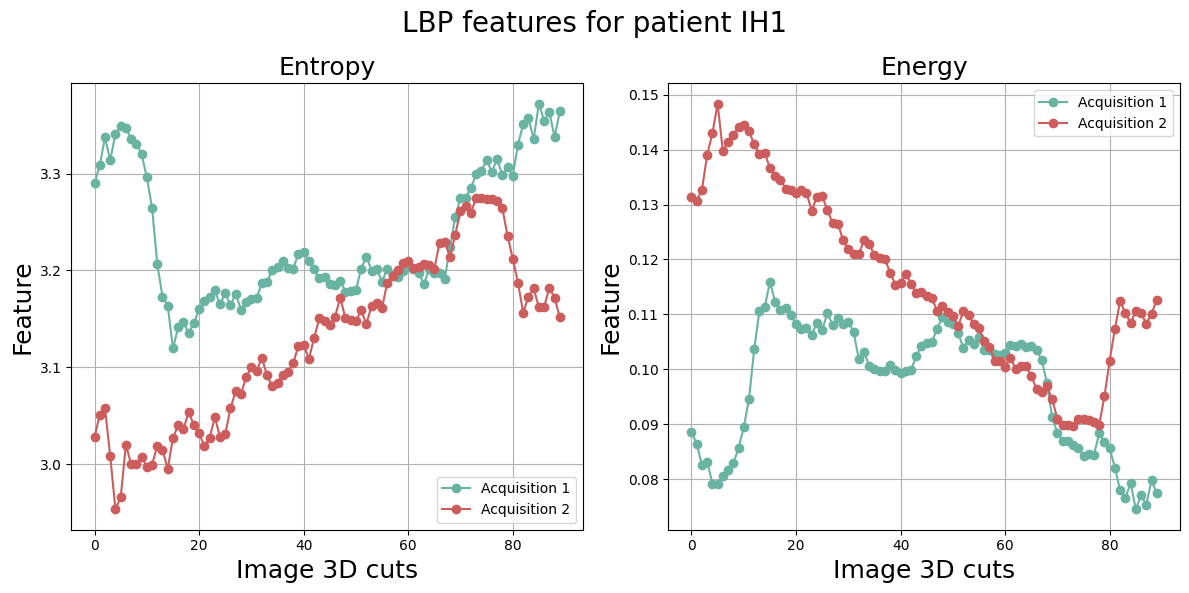

Le coefficient de variation de l'entropie entre les deux acquisitions est 3.2720889754896216
Le coefficient de variation de l'énergie entre les deux acquisitions est 17.511167717178594


In [98]:
IH1_acq1, IH1_acq2, IH1_mean = LBP_treatement(echo_IH1_before_reslice_acq1, seg_IH1_before_reslice_acq1, 266, 356, echo_IH1_before_reslice_acq2, seg_IH1_before_reslice_acq2, 249, 339, 8,1, "LBP features for patient IH1")

In [100]:
CA1_acq1, CA1_acq2, CA1_mean = LBP_treatement(echo_CA1_before_reslice_acq1, seg_CA1_before_reslice_acq1, 299, 389, echo_CA1_before_reslice_acq2, seg_CA1_before_reslice_acq2, 312, 402, 8,1, "LBP features for patient IH1")

UnboundLocalError: cannot access local variable 'j' where it is not associated with a value